# Data collection + cleaning and sentiment analysis

In [554]:
# Import libraries.
import pandas as pd
!pip install yfinance
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [555]:
# Create function to validate dataframe.
def validate_dataframe(dataframe):
    # View data types.
    print("Data Types:")
    print(dataframe.dtypes)

    # View metadata.
    print("\nDataFrame Info:")
    print(dataframe.info())

    # Descriptive statistics.
    print("\nDescriptive Statistics:")
    print(dataframe.describe())

    # Check for missing values.
    missing_values = dataframe.isna().sum()
    if missing_values.sum() > 0:
        print("\nMissing Values:")
        print(missing_values)
    else:
        print("\nNo missing values found.")

    # Check for duplicates.
    num_duplicates = dataframe.duplicated().sum()
    if num_duplicates > 0:
        print("\nDuplicates:")
        print(f"Found {num_duplicates} duplicate rows.")
    else:
        print("\nNo duplicates found.")

    # View the DataFrame.
    print("\nDataFrame Preview:")
    return(dataframe)

In [556]:
# Create function to obtain stock market data.
def get_stock_market_data(ticker_symbol):
    # try and except added for error handling and debugging.
    try:
        # Create a Ticker object for the given ticker symbol.
        ticker = yf.Ticker(ticker_symbol)

        # Get historical data from inception to present.
        historical_data = ticker.history(period="max")

        return historical_data
    except Exception as e:
        return f"Error: {e}"

In [557]:
# Import the CSV file containing central bank speeches.
# The code assumes the csv file is in the working directory.
speeches = pd.read_csv('all_speeches.csv')

# Sense-check imported dataframe.
validate_dataframe(speeches)

Data Types:
reference    object
country      object
date         object
title        object
author       object
is_gov        int64
text         object
dtype: object

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  7721 non-null   object
 1   country    7721 non-null   object
 2   date       7721 non-null   object
 3   title      7721 non-null   object
 4   author     7721 non-null   object
 5   is_gov     7721 non-null   int64 
 6   text       7721 non-null   object
dtypes: int64(1), object(6)
memory usage: 422.4+ KB
None

Descriptive Statistics:
            is_gov
count  7721.000000
mean      0.347235
std       0.476122
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

No missing values found.

No duplicates found.

DataFrame Preview:


reference        country        date  \
0      r901128a_BOA      australia  1990-11-28   
1      r911003a_BOA      australia  1991-10-03   
2      r920314a_BOA      australia  1992-03-14   
3      r920529a_BOA      australia  1992-05-29   
4      r920817a_BOA      australia  1992-08-17   
...             ...            ...         ...   
7716  r221010a_FOMC  united states  2022-10-10   
7717  r221012b_FOMC  united states  2022-10-12   
7718  r221012a_FOMC  united states  2022-10-12   
7719  r221014a_FOMC  united states  2022-10-14   
7720  r221020a_FOMC  united states  2022-10-20   

                                                  title    author  is_gov  \
0                     A Proper Role for Monetary Policy    fraser       0   
1                                                          fraser       0   
2                                                          fraser       0   
3                                                          fraser       0   
4                                                          fraser       0   
...                                                 ...       ...     ...   
7716  Restoring Price Stability in an Uncertain Econ...  brainard       0   
7717  Managing the Promise and Risk of Financial Inn...      barr       0   
7718  Forward Guidance as a Monetary Policy Tool: Co...    bowman       0   
7719  The U.S. Dollar and Central Bank Digital Curre...    waller       0   
7720                                  Welcoming Remarks    bowman       0   

                                                   text  
0     They would no doubt argue that to have two obj...  
1     Today I wish to talk about real interest rates...  
2     I welcome this opportunity to talk about prosp...  
3     It is a pleasure to have this opportunity to a...  
4     As a long-time fan of Don Sanders, I am deligh...  
...                                                 ...  
7716  It is a pleasure to join this discussion today...  
7717  Thank you, Chris, and thank you for the invita...  
7718  Thanks to the Money Marketeers for inviting me...  
7719  Thank you, Professor Jackson, and thank you to...  
7720  Welcome, and thank you for joining us to discu...  

[7721 rows x 7 columns]

In [558]:
# Change the data type of the date column to 'datetime'.
speeches['date'] = pd.to_datetime(speeches['date'])

# Check the data type following the change.
speeches.dtypes

reference            object
country              object
date         datetime64[ns]
title                object
author               object
is_gov                int64
text                 object
dtype: object

In [559]:
# Rename country column.
speeches.rename(columns={'country': 'location'}, inplace=True)

# Identify anomalous dates (descending order).
speeches.sort_values(by='date', ascending=False, inplace=True)

# View the output.
speeches.head()

reference     location       date  \
4960  r221110a_SNB  switzerland 2022-11-10   
3254  r221104a_ECB    euro area 2022-11-04   
3253  r221104b_ECB    euro area 2022-11-04   
3252  r221103a_ECB    euro area 2022-11-03   
903   r221102a_BOC       canada 2022-11-02   

                                                  title   author  is_gov  \
4960  Current challenges to central banks' independence   jordan       1   
3254  Monetary policy in a high inflation environmen...  lagarde       1   
3253    The euro area economy and the energy transition  guindos       0   
3252  Mind the step: calibrating monetary policy in ...  panetta       0   
903                  Preparing for payments supervision   morrow       0   

                                                   text  
4960  Ladies and gentlemen I am very grateful for th...  
3254  Inflation in the euro area is far too high, re...  
3253  I am very pleased to be taking part in this ev...  
3252  The euro area is facing a sequence of unpreced...  
903   Good morning, and thank you for inviting me to...

The most recent speeches appear to have correct dates.

In [560]:
# Identify anomalous dates (ascending order).
speeches.sort_values(by='date', ascending=True, inplace=True)

# View the output.
speeches.head()

reference   location       date                               title  \
4010  r000101a_SRB     sweden 1900-01-01       Swedish economy in transition   
0     r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1     r911003a_BOA  australia 1991-10-03                                       
2     r920314a_BOA  australia 1992-03-14                                       
3     r920529a_BOA  australia 1992-05-29                                       

         author  is_gov                                               text  
4010  backstrom       1  Thank you for inviting me to talk with you thi...  
0        fraser       0  They would no doubt argue that to have two obj...  
1        fraser       0  Today I wish to talk about real interest rates...  
2        fraser       0  I welcome this opportunity to talk about prosp...  
3        fraser       0  It is a pleasure to have this opportunity to a...

The date of the speech from the year 1900 is anomalous. Further research shows the correct date is 2nd October 2000.

In [561]:
# Update the 'date' column for the found row using .loc.
speeches.loc[4010, 'date'] = '2000-10-02'

# Display the updated DataFrame.
speeches.head()

reference   location       date                               title  \
4010  r000101a_SRB     sweden 2000-10-02       Swedish economy in transition   
0     r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1     r911003a_BOA  australia 1991-10-03                                       
2     r920314a_BOA  australia 1992-03-14                                       
3     r920529a_BOA  australia 1992-05-29                                       

         author  is_gov                                               text  
4010  backstrom       1  Thank you for inviting me to talk with you thi...  
0        fraser       0  They would no doubt argue that to have two obj...  
1        fraser       0  Today I wish to talk about real interest rates...  
2        fraser       0  I welcome this opportunity to talk about prosp...  
3        fraser       0  It is a pleasure to have this opportunity to a...

In [562]:
# Check the number of locations.
speeches['location'].value_counts()

euro area         2351
united states     1551
united kingdom    1209
japan              755
canada             620
sweden             600
switzerland        351
australia          284
Name: location, dtype: int64

In [563]:
# Group 'sweden' and 'switzerland' under 'Euro Area'.
speeches['location'] = speeches['location'].apply(lambda x: 'euro area' if x in ['sweden', 'switzerland'] else x)

# Check the number of locations following grouping.
speeches['location'].value_counts()

euro area         3302
united states     1551
united kingdom    1209
japan              755
canada             620
australia          284
Name: location, dtype: int64

In [564]:
# Rename the different values/locations.
new_locations = {'euro area': 'EU', 'united states': 'US', 'united kingdom': 'UK',
                 'japan': 'JPN', 'canada': 'CAN', 'australia': 'AUS'}

# Apply new location values to dataset.
speeches['location'] = speeches['location'].replace(new_locations)

# Verify locations in dataset.
speeches['location'].value_counts()

EU     3302
US     1551
UK     1209
JPN     755
CAN     620
AUS     284
Name: location, dtype: int64

## 2. Prepare the data for NLP

In [565]:
# Import all the necessary packages.
import numpy as np
import nltk 
import os 

# Import nltk and download nltk's resources to assist with tokenisation.
import nltk
nltk.download('punkt')

# Download the stopword list.
nltk.download ('stopwords')
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2a) Change to lower case and join the elements in the 'text' column

In [566]:
# Change the words to lower case for the text column and join them with a space.
speeches['text'] = speeches['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View the output.
speeches.head()

reference location       date                               title  \
4010  r000101a_SRB       EU 2000-10-02       Swedish economy in transition   
0     r901128a_BOA      AUS 1990-11-28   A Proper Role for Monetary Policy   
1     r911003a_BOA      AUS 1991-10-03                                       
2     r920314a_BOA      AUS 1992-03-14                                       
3     r920529a_BOA      AUS 1992-05-29                                       

         author  is_gov                                               text  
4010  backstrom       1  thank you for inviting me to talk with you thi...  
0        fraser       0  they would no doubt argue that to have two obj...  
1        fraser       0  today i wish to talk about real interest rates...  
2        fraser       0  i welcome this opportunity to talk about prosp...  
3        fraser       0  it is a pleasure to have this opportunity to a...

### 2b) Replace punctuation in the 'text' column

In [567]:
# Remove punctuation from each of the speeches.
speeches['text'] = speeches['text'].str.replace('[^\w\s]', '')

# View output.
speeches['text']

4010    thank you for inviting me to talk with you thi...
0       they would no doubt argue that to have two obj...
1       today i wish to talk about real interest rates...
2       i welcome this opportunity to talk about prosp...
3       it is a pleasure to have this opportunity to a...
                              ...                        
903     good morning and thank you for inviting me to ...
3252    the euro area is facing a sequence of unpreced...
3253    i am very pleased to be taking part in this ev...
3254    inflation in the euro area is far too high rea...
4960    ladies and gentlemen i am very grateful for th...
Name: text, Length: 7721, dtype: object

### 3. Tokenise and create worldclouds

In [568]:
# Create new DataFrame (copy DataFrame).
speeches_text = speeches[['text']]

# View DataFrame.
speeches_text

text
4010  thank you for inviting me to talk with you thi...
0     they would no doubt argue that to have two obj...
1     today i wish to talk about real interest rates...
2     i welcome this opportunity to talk about prosp...
3     it is a pleasure to have this opportunity to a...
...                                                 ...
903   good morning and thank you for inviting me to ...
3252  the euro area is facing a sequence of unpreced...
3253  i am very pleased to be taking part in this ev...
3254  inflation in the euro area is far too high rea...
4960  ladies and gentlemen i am very grateful for th...

[7721 rows x 1 columns]

In [569]:
%%time
# Apply tokenisation to 'text' column.
speeches_text['text_tokens'] = speeches_text['text'].apply(word_tokenize)

# View DataFrame.
speeches_text.head()

CPU times: total: 46.2 s
Wall time: 46.2 s


text  \
4010  thank you for inviting me to talk with you thi...   
0     they would no doubt argue that to have two obj...   
1     today i wish to talk about real interest rates...   
2     i welcome this opportunity to talk about prosp...   
3     it is a pleasure to have this opportunity to a...   

                                            text_tokens  
4010  [thank, you, for, inviting, me, to, talk, with...  
0     [they, would, no, doubt, argue, that, to, have...  
1     [today, i, wish, to, talk, about, real, intere...  
2     [i, welcome, this, opportunity, to, talk, abou...  
3     [it, is, a, pleasure, to, have, this, opportun...

In [570]:
%%time
# Create a word cloud for the 'text' column.
wordcloud_text = WordCloud(
    width = 1600, 
    height = 900, 
    background_color ='white', 
    colormap='plasma',
    stopwords = 'none',
    min_font_size = 10)

# Generate wordcloud.
wordcloud_text.generate(' '.join(speeches_text['text_tokens'].apply(' '.join)))

CPU times: total: 54.5 s
Wall time: 54.6 s


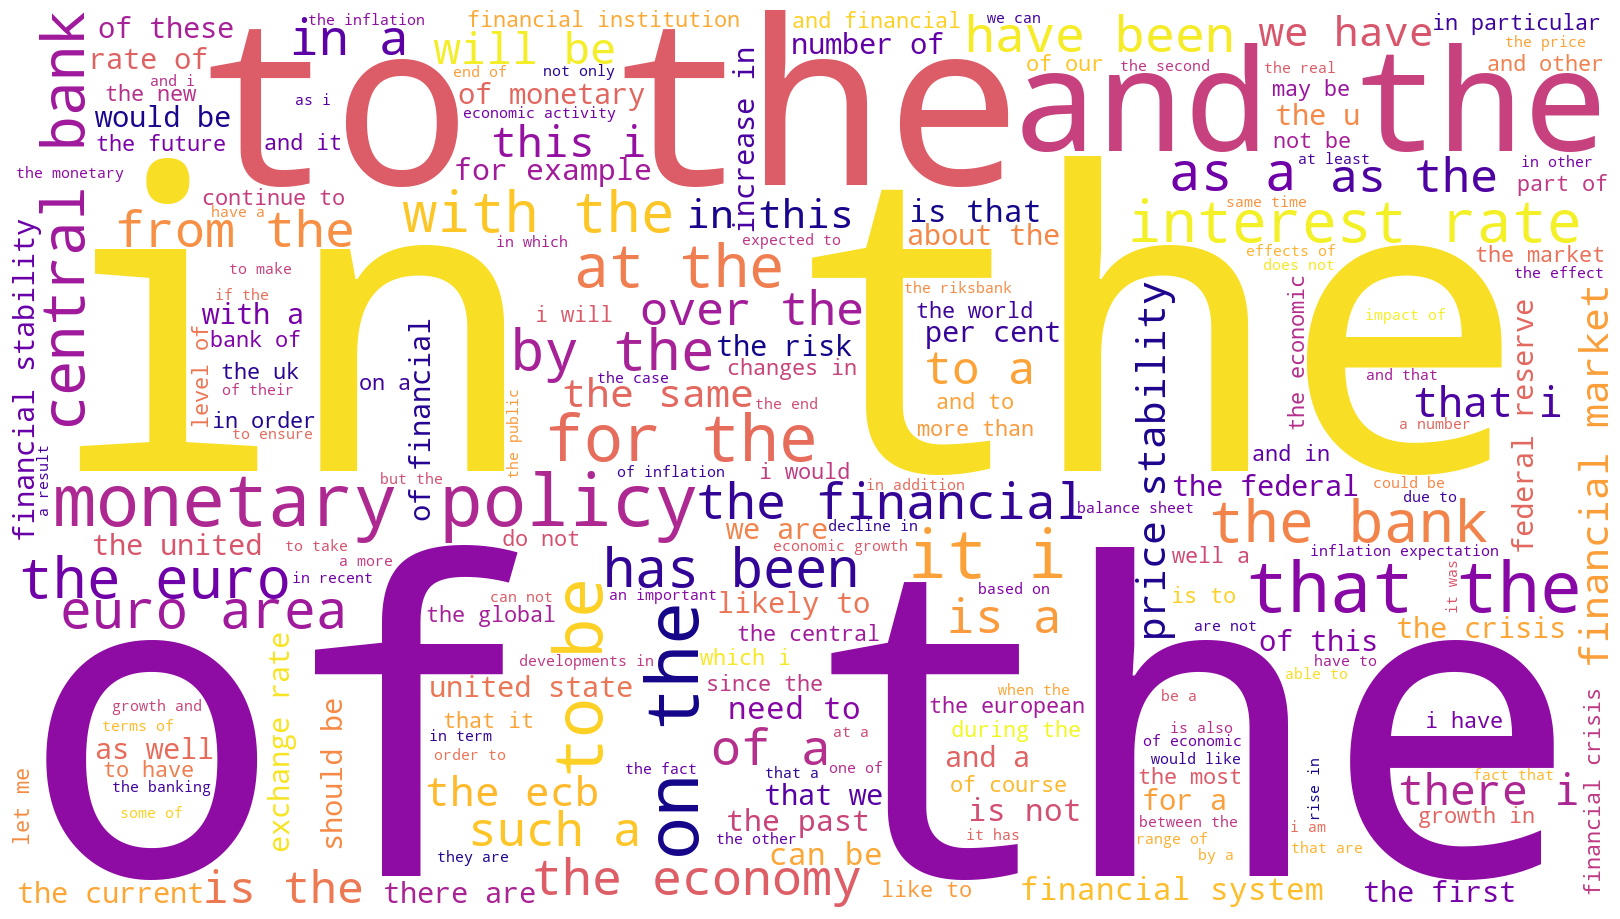

In [571]:
# text column: Plot the WordCloud image.                  
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_text) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [572]:
# View dataframe.
speeches_text.head()

text  \
4010  thank you for inviting me to talk with you thi...   
0     they would no doubt argue that to have two obj...   
1     today i wish to talk about real interest rates...   
2     i welcome this opportunity to talk about prosp...   
3     it is a pleasure to have this opportunity to a...   

                                            text_tokens  
4010  [thank, you, for, inviting, me, to, talk, with...  
0     [they, would, no, doubt, argue, that, to, have...  
1     [today, i, wish, to, talk, about, real, intere...  
2     [i, welcome, this, opportunity, to, talk, abou...  
3     [it, is, a, pleasure, to, have, this, opportun...

In [573]:
# Create frequency distribution for the 'text' column.
all_text_tokens = [token for tokens in speeches_text['text_tokens'] for token in tokens]
freq_dist_text = FreqDist(all_text_tokens)

# View frequency distribution for 'text'.
print("Frequency Distribution for 'text' column:")
print(freq_dist_text)

Frequency Distribution for 'text' column:
<FreqDist with 94376 samples and 23951413 outcomes>


In [574]:
# Display the 15 most common words in text column.
most_common_text = freq_dist_text.most_common(15)

print("15 Most Common Words in 'text':")
for word, freq in most_common_text:
    print(f'{word}: {freq}')

15 Most Common Words in 'text':
the: 1738306
of: 865975
to: 753435
in: 664417
and: 651488
a: 437622
that: 339566
is: 318717
for: 247762
as: 194547
on: 178108
be: 172547
this: 170524
have: 158688
are: 154962


### 4b. Remove alphanumeric characters

In [575]:
# Delete all the alpha-numeric characters.
all_text_tokens = [word for word in all_text_tokens if word.isalnum()]

### 4c. Remove stopwords

In [576]:
# Create a set of stopwords.
stop_words = set(stopwords.words('english'))

In [577]:
# Remove stopword in text.
text_stopwords = [word for word in all_text_tokens if word.lower() not in stop_words]

# Recalculate frequency after removing stopwords.
freq_dist_text2 = FreqDist(text_stopwords)

# View frequency. 
freq_dist_text2

FreqDist({'financial': 121567, 'policy': 111663, 'inflation': 86990, 'monetary': 84842, 'banks': 78885, 'bank': 68843, 'rate': 68803, 'market': 68236, 'also': 66403, 'would': 65665, ...})

### 4d. Create wordclouds without stopwords

In [578]:
# Create a wordcloud without stop words.
# Review: Create a word cloud.
wordcloud_text = WordCloud(
    width = 1600, 
    height = 900, 
    background_color ='white', 
    colormap='plasma',
    stopwords = 'none',
    min_font_size = 10)

# Generate wordcloud.
wordcloud_text.generate(" ".join(text_stopwords))

(-0.5, 1599.5, 899.5, -0.5)

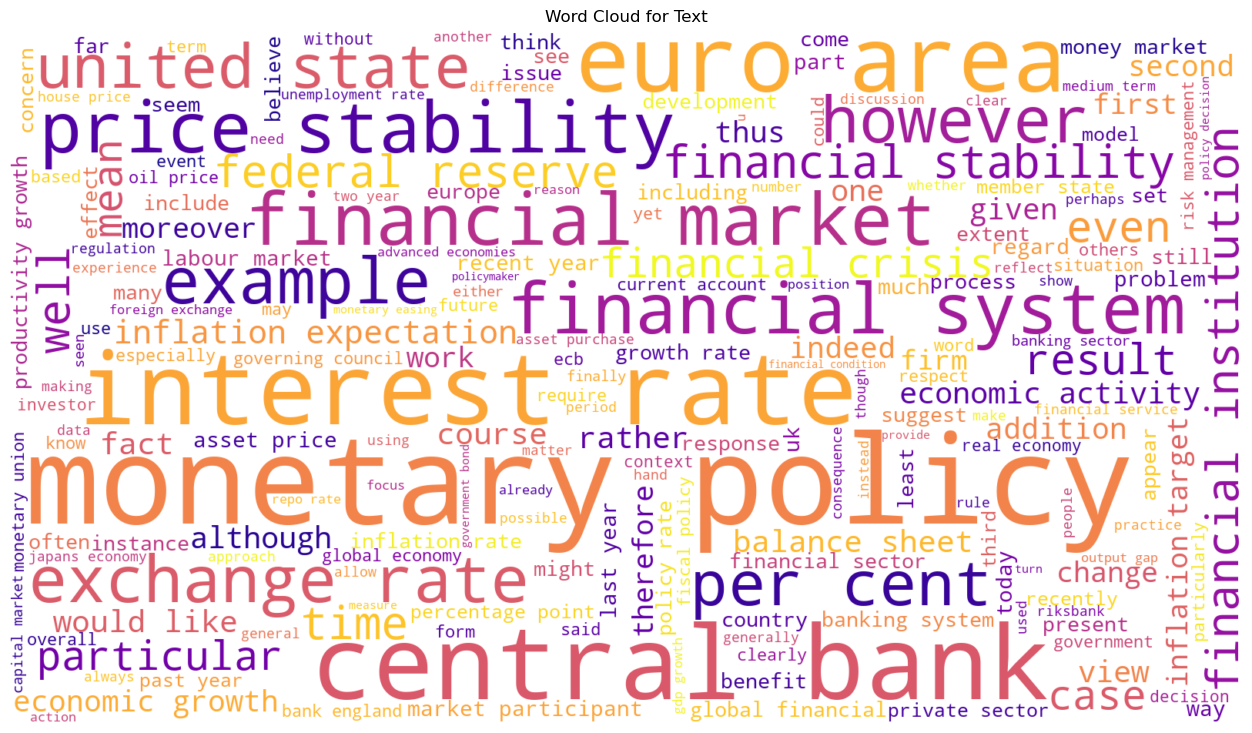

In [579]:
# Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor = None)
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.title('Word Cloud for Text')
plt.axis('off')

### 4e. Identify 15 most commom words and polarity

In [580]:
# Determine the 15 most common words.
most_common_text = freq_dist_text2.most_common(15)

print("15 Most Common Words in 'text':")
for word, freq in most_common_text:
    print(f'{word}: {freq}')

15 Most Common Words in 'text':
financial: 121567
policy: 111663
inflation: 86990
monetary: 84842
banks: 78885
bank: 68843
rate: 68803
market: 68236
also: 66403
would: 65665
economic: 63806
growth: 63404
economy: 60510
central: 47772
rates: 47449


In [581]:
# Calculate sentiment polarity for the 15 most common words in 'text'.
for word, _ in most_common_text:
    blob = TextBlob(word)
    word_polarity = blob.sentiment.polarity
    print(f'{word}: Polarity = {word_polarity}')

financial: Polarity = 0.0
policy: Polarity = 0.0
inflation: Polarity = 0.0
monetary: Polarity = 0.0
banks: Polarity = 0.0
bank: Polarity = 0.0
rate: Polarity = 0.0
market: Polarity = 0.0
also: Polarity = 0.0
would: Polarity = 0.0
economic: Polarity = 0.2
growth: Polarity = 0.0
economy: Polarity = 0.0
central: Polarity = 0.0
rates: Polarity = 0.0


## 5. Review polarity and sentiment
 Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [582]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [583]:
# Determine sentiment polarity of the text column. 
speeches_text['text_polarity'] = speeches_text['text'].apply(generate_polarity)

# View output.
speeches_text.head(10)

text  \
4010  thank you for inviting me to talk with you thi...   
0     they would no doubt argue that to have two obj...   
1     today i wish to talk about real interest rates...   
2     i welcome this opportunity to talk about prosp...   
3     it is a pleasure to have this opportunity to a...   
4     as a longtime fan of don sanders i am delighte...   
5     i have been looking forward to this opportunit...   
6     economic growth is usually viewed from a short...   
7     vision is not one of my favourite words it can...   
8     i welcome this opportunity to mention some dev...   

                                            text_tokens  text_polarity  
4010  [thank, you, for, inviting, me, to, talk, with...       0.114830  
0     [they, would, no, doubt, argue, that, to, have...       0.077493  
1     [today, i, wish, to, talk, about, real, intere...       0.116070  
2     [i, welcome, this, opportunity, to, talk, abou...       0.112064  
3     [it, is, a, pleasure, to, have, this, opportun...       0.092684  
4     [as, a, longtime, fan, of, don, sanders, i, am...       0.102694  
5     [i, have, been, looking, forward, to, this, op...       0.117977  
6     [economic, growth, is, usually, viewed, from, ...       0.126702  
7     [vision, is, not, one, of, my, favourite, word...       0.128325  
8     [i, welcome, this, opportunity, to, mention, s...       0.078108

Text(0, 0.5, 'Text Frequency')

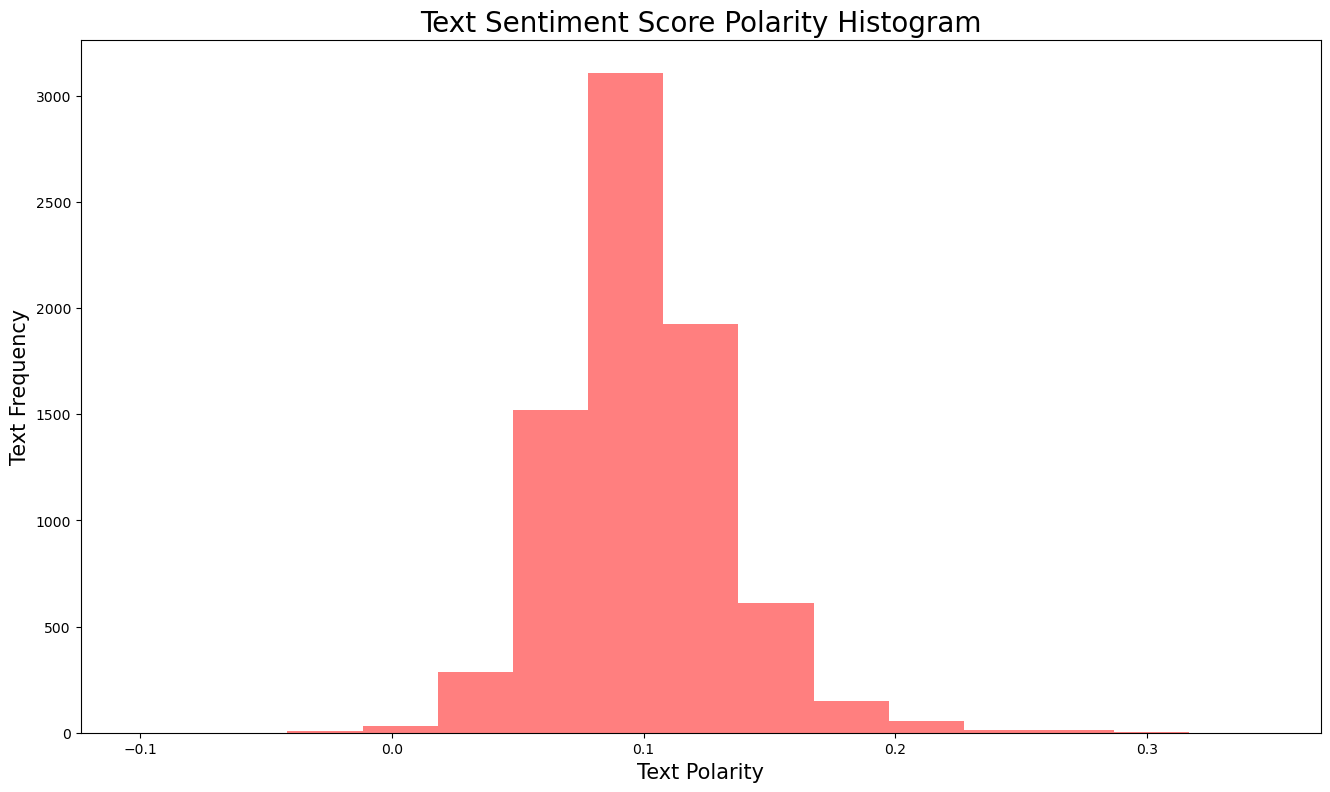

In [584]:
# Create a histogram plot with bins = 15.
# Histogram of polarity.
plt.figure(figsize = (16,9))
plt.hist(speeches_text['text_polarity'], bins=15, alpha=0.5, facecolor='red')

# Set labels. 
plt.title('Text Sentiment Score Polarity Histogram', fontsize = 20)
plt.xlabel('Text Polarity', fontsize=15)
plt.ylabel('Text Frequency', fontsize=15)

In [585]:
# Define a function to extract a subjectivity polarity score for the text column.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [586]:
# Determine subjectivity polarity of the text columns. 
speeches_text['text_subjectivity'] = speeches_text['text'].apply(generate_subjectivity)

# View output.
speeches_text.head(10)

text  \
4010  thank you for inviting me to talk with you thi...   
0     they would no doubt argue that to have two obj...   
1     today i wish to talk about real interest rates...   
2     i welcome this opportunity to talk about prosp...   
3     it is a pleasure to have this opportunity to a...   
4     as a longtime fan of don sanders i am delighte...   
5     i have been looking forward to this opportunit...   
6     economic growth is usually viewed from a short...   
7     vision is not one of my favourite words it can...   
8     i welcome this opportunity to mention some dev...   

                                            text_tokens  text_polarity  \
4010  [thank, you, for, inviting, me, to, talk, with...       0.114830   
0     [they, would, no, doubt, argue, that, to, have...       0.077493   
1     [today, i, wish, to, talk, about, real, intere...       0.116070   
2     [i, welcome, this, opportunity, to, talk, abou...       0.112064   
3     [it, is, a, pleasure, to, have, this, opportun...       0.092684   
4     [as, a, longtime, fan, of, don, sanders, i, am...       0.102694   
5     [i, have, been, looking, forward, to, this, op...       0.117977   
6     [economic, growth, is, usually, viewed, from, ...       0.126702   
7     [vision, is, not, one, of, my, favourite, word...       0.128325   
8     [i, welcome, this, opportunity, to, mention, s...       0.078108   

      text_subjectivity  
4010           0.420615  
0              0.444352  
1              0.411039  
2              0.432086  
3              0.386479  
4              0.437566  
5              0.439418  
6              0.419346  
7              0.444513  
8              0.392754

Text(0, 0.5, 'Text Frequency')

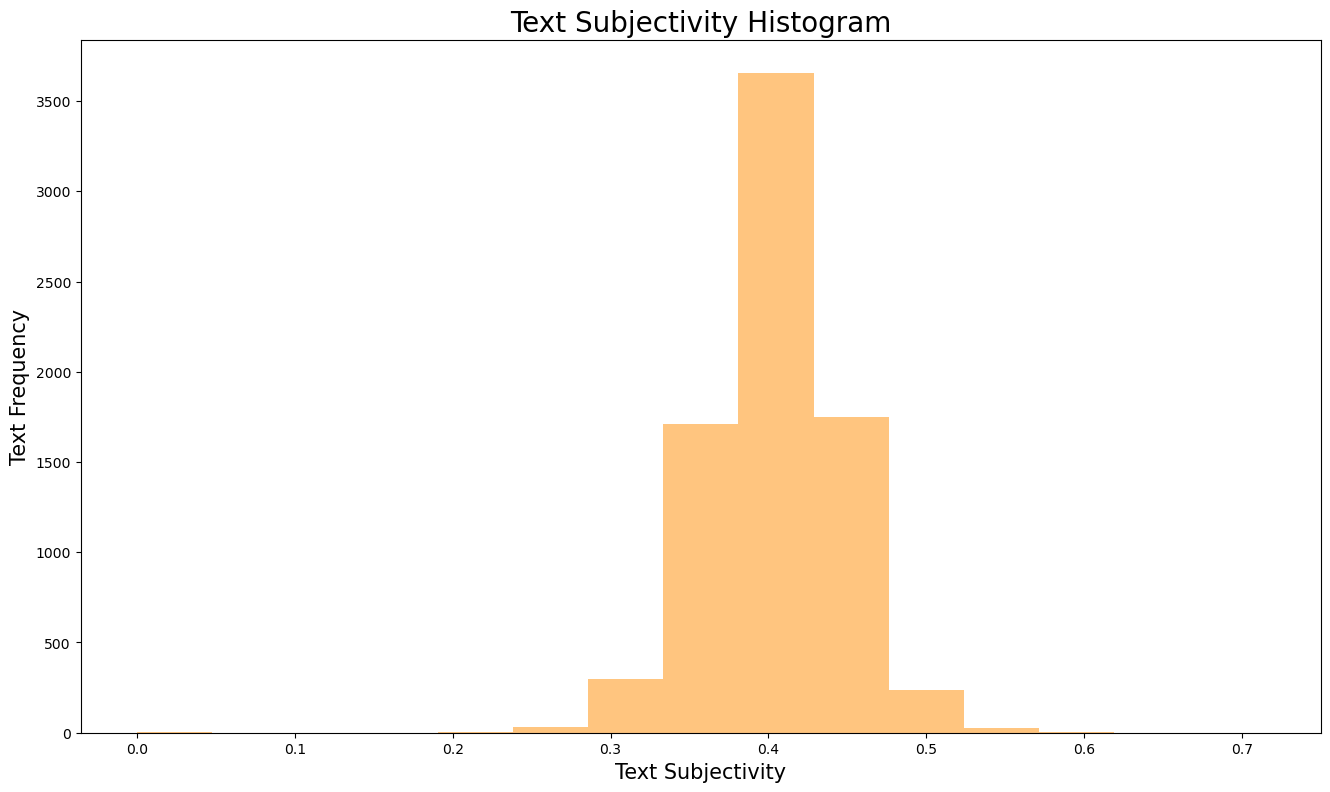

In [587]:
# Histogram of subjectivity.
plt.figure(figsize = (16,9))
plt.hist(speeches_text['text_subjectivity'], bins=15, alpha=0.5, facecolor='darkorange')

# Set labels. 
plt.title('Text Subjectivity Histogram', fontsize = 20)
plt.xlabel('Text Subjectivity', fontsize=15)
plt.ylabel('Text Frequency', fontsize=15)

## 6. Identify top 20 positive and negative speeches

In [588]:
# Top 20 positive speeches.
top_positive_text = speeches_text.nlargest(20, 'text_polarity')

# View output.
print("\nTop 20 Positive Text:")
top_positive_text[['text', 'text_polarity']]


Top 20 Positive Text:


text  text_polarity
5980  at the most senior levels in the organisation ...       0.346667
5029  call me a masochist if you like but i actually...       0.307699
6781  the federal reserve the central bank of the un...       0.295009
775   governor of the bank of canada it is the bank ...       0.288651
7469  good afternoon thank you senator reed for the ...       0.286229
5529  good morning everyone i am delighted to welcom...       0.282180
606   governor of the bank of canada official ceremo...       0.273994
398   good morning everyone and welcome welcome also...       0.272352
6691  good morning i appreciate the opportunity to p...       0.270731
7710  for release on delivery by at the good morning...       0.269531
7285  federal reserve board have organized this conf...       0.267728
1766  slovakia is the fourth country to join the eur...       0.267500
773   governor of the bank of canada it is an honour...       0.264823
3180  it is a pleasure to be here today to speak wit...       0.262276
1983  ladies and gentlemen the introduction of the e...       0.261644
738   governor of the bank of canada distinguished g...       0.259331
801   thank you all for being here for the opening o...       0.258558
2494  we chose to call this t2s launch celebration t...       0.243716
7256  good afternoon thank you dan and thank you to ...       0.243709
7391  thank you and thank you to all the educators w...       0.241969

**Top 20 Negative Text:**

In [589]:
# Top 20 negative reviews.
top_negative_text = speeches_text.nsmallest(20, 'text_polarity')

# View output.
print("\nTop 20 Negative Text:")
top_negative_text[['text', 'text_polarity']]


Top 20 Negative Text:


text  text_polarity
3134  note hicpx refers to hicp excluding energy and...      -0.101250
3126  note data for ireland not included due to data...      -0.035000
7363  i would like briefly to describe the legal fra...      -0.029791
3171  note word cloud is based on the responses to t...      -0.028385
3321  click on 91kb to download the full text any te...      -0.024950
4836  ladies and gentlemen thank you for accepting o...      -0.021162
1880  it is a pleasure to be here among you and to s...      -0.019444
3727  statement by haruhiko kuroda governor of the b...      -0.017551
444   today we released the april mpr which discusse...      -0.013690
3728  today i am very pleased to appear before the v...      -0.008744
2543  i am honoured to be speaking here today beside...      -0.006663
3770  statement by haruhiko kuroda governor of the b...      -0.002951
3783  statement by haruhiko kuroda governor of the b...      -0.002262
3070  notes a positive negative number indicates net...      -0.001454
3726  i would like to start my remarks with a look a...      -0.000881
3775  statement by haruhiko kuroda governor of the b...      -0.000090
4427  figure 1 forecast errors for a number of analy...       0.000000
795   i  a fi  b fi  n bankofcanadaca bankofcanadaca...       0.000000
2757  the call for greater proportionality in bankin...       0.001000
3769  japans economic activity and prices through fi...       0.001218

In [590]:
# Add sentiment scores to original dataframe.
speeches['text_polarity'] = speeches_text['text_polarity']

In [591]:
# View the output.
speeches.head()

reference location       date                               title  \
4010  r000101a_SRB       EU 2000-10-02       Swedish economy in transition   
0     r901128a_BOA      AUS 1990-11-28   A Proper Role for Monetary Policy   
1     r911003a_BOA      AUS 1991-10-03                                       
2     r920314a_BOA      AUS 1992-03-14                                       
3     r920529a_BOA      AUS 1992-05-29                                       

         author  is_gov                                               text  \
4010  backstrom       1  thank you for inviting me to talk with you thi...   
0        fraser       0  they would no doubt argue that to have two obj...   
1        fraser       0  today i wish to talk about real interest rates...   
2        fraser       0  i welcome this opportunity to talk about prosp...   
3        fraser       0  it is a pleasure to have this opportunity to a...   

      text_polarity  
4010       0.114830  
0          0.077493  
1          0.116070  
2          0.112064  
3          0.092684

# Analysis Using Custom Threshold Values for Polarity

Different values were tested for a custom threshold to try and balance the number of speeches with a positive and negative sentiment. The custom polarity threshold values were set and the number of positive, negative and neutral sentiments were visualised. At the end, the custom threshold chosen was the mean sentiment score of all speeches.

In [592]:
from textblob import TextBlob

# Example list of words.
word_list = ["positive", "negative", "neutral", "amazing", "terrible", "average"]

# Set your custom threshold.
custom_threshold = speeches_text['text_polarity'].mean()

for word in word_list:
    blob = TextBlob(word)
    word_polarity = blob.sentiment.polarity

    if word_polarity > custom_threshold:
        sentiment = 'Positive'
    elif word_polarity < -custom_threshold:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    print(f'{word}: Polarity = {word_polarity}, Sentiment = {sentiment}')

positive: Polarity = 0.22727272727272727, Sentiment = Positive
negative: Polarity = -0.3, Sentiment = Negative
neutral: Polarity = 0.0, Sentiment = Neutral
amazing: Polarity = 0.6000000000000001, Sentiment = Positive
terrible: Polarity = -1.0, Sentiment = Negative
average: Polarity = -0.15, Sentiment = Negative


In [593]:
# Define a function to assign sentiment based on the custom threshold.
def assign_sentiment(text):
    blob = TextBlob(text)
    word_polarity = blob.sentiment.polarity
    if word_polarity > custom_threshold:
        return 'Positive'
    elif word_polarity < -custom_threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the 'Text' column and create a new 'Sentiment' column.
speeches['Sentiment'] = speeches['text'].apply(assign_sentiment)

# Display the updated DataFrame.
print(speeches)

         reference location       date  \
4010  r000101a_SRB       EU 2000-10-02   
0     r901128a_BOA      AUS 1990-11-28   
1     r911003a_BOA      AUS 1991-10-03   
2     r920314a_BOA      AUS 1992-03-14   
3     r920529a_BOA      AUS 1992-05-29   
...            ...      ...        ...   
903   r221102a_BOC      CAN 2022-11-02   
3252  r221103a_ECB       EU 2022-11-03   
3253  r221104b_ECB       EU 2022-11-04   
3254  r221104a_ECB       EU 2022-11-04   
4960  r221110a_SNB       EU 2022-11-10   

                                                  title     author  is_gov  \
4010                      Swedish economy in transition  backstrom       1   
0                     A Proper Role for Monetary Policy     fraser       0   
1                                                           fraser       0   
2                                                           fraser       0   
3                                                           fraser       0   
...                        

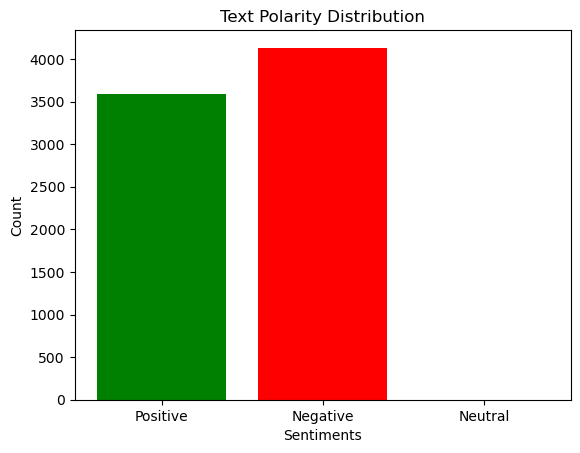

In [594]:
# Calculate the count of positive, negative, and neutral texts based on your threshold.
positive_count = len(speeches[speeches['text_polarity'] > 0.1])
negative_count = len(speeches[speeches['text_polarity'] < 0.1])
neutral_count = len(speeches[speeches['text_polarity'] == 0.1])

# Create a bar chart.
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.bar(sentiments, counts, color=['green', 'red', 'gray'])

# Add labels and title.
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Text Polarity Distribution')

# Display the bar chart.
plt.show()

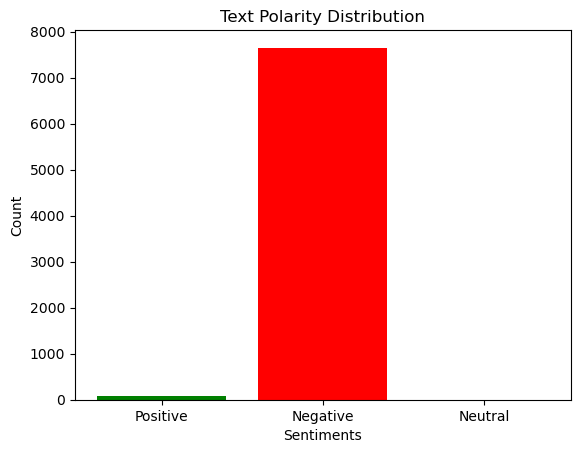

In [595]:
# Calculate the count of positive, negative, and neutral texts based on your threshold.
positive_count = len(speeches[speeches['text_polarity'] > 0.2])
negative_count = len(speeches[speeches['text_polarity'] < 0.2])
neutral_count = len(speeches[speeches['text_polarity'] == 0.2])

# Create a bar chart.
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.bar(sentiments, counts, color=['green', 'red', 'gray'])

# Add labels and title.
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Text Polarity Distribution')

# Display the bar chart.
plt.show()

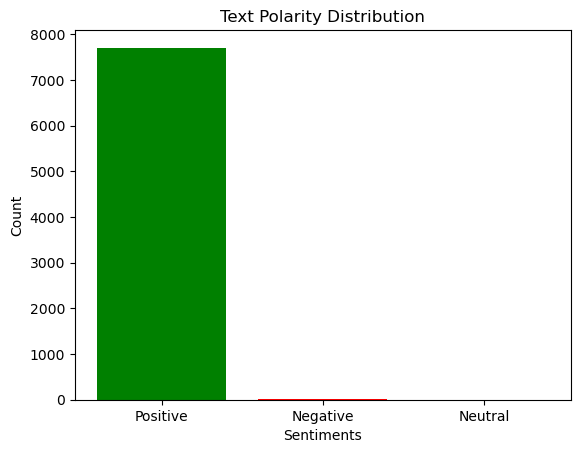

In [596]:
# Calculate the count of positive, negative, and neutral texts based on your threshold.
positive_count = len(speeches[speeches['text_polarity'] > 0.0])
negative_count = len(speeches[speeches['text_polarity'] < 0.0])
neutral_count = len(speeches[speeches['text_polarity'] == 0.0])

# Create a bar chart.
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.bar(sentiments, counts, color=['green', 'red', 'gray'])

# Add labels and title.
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Text Polarity Distribution')

# Display the bar chart.
plt.show()

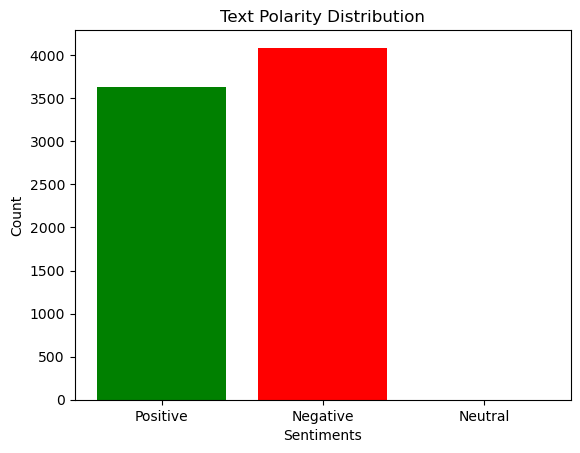

In [597]:
# Calculate the count of positive, negative, and neutral texts based on your threshold.
positive_count = len(speeches[speeches['text_polarity'] > custom_threshold])
negative_count = len(speeches[speeches['text_polarity'] < custom_threshold])
neutral_count = len(speeches[speeches['text_polarity'] == custom_threshold])

# Create a bar chart.
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

plt.bar(sentiments, counts, color=['green', 'red', 'gray'])

# Add labels and title.
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Text Polarity Distribution')

# Display the bar chart.
plt.show()

# Obtain and clean stock market indicies

## Obtain and clean Australian index(S&P/ASX 200) data

In [598]:
# Use function to obtain historical data for ASX 200 and then print output.
ticker_symbol_asx200 = "^AXJO"
asx200_data = get_stock_market_data(ticker_symbol_asx200)
print(asx200_data)

                                  Open         High          Low        Close  \
Date                                                                            
1992-11-23 00:00:00+11:00  1455.000000  1455.000000  1455.000000  1455.000000   
1992-11-24 00:00:00+11:00  1458.400024  1458.400024  1458.400024  1458.400024   
1992-11-25 00:00:00+11:00  1467.900024  1467.900024  1467.900024  1467.900024   
1992-11-26 00:00:00+11:00  1459.000000  1459.000000  1459.000000  1459.000000   
1992-11-27 00:00:00+11:00  1458.900024  1458.900024  1458.900024  1458.900024   
...                                ...          ...          ...          ...   
2023-11-20 00:00:00+11:00  7049.399902  7072.399902  7048.500000  7058.399902   
2023-11-21 00:00:00+11:00  7058.399902  7089.600098  7058.399902  7078.200195   
2023-11-22 00:00:00+11:00  7078.200195  7090.399902  7061.899902  7073.399902   
2023-11-23 00:00:00+11:00  7073.399902  7073.399902  7026.899902  7029.200195   
2023-11-24 00:00:00+11:00  7

In [599]:
# Reset the index of the dataframe to assist with changing the format of the date column.
asx200_data.reset_index(inplace=True)

# Check of the first five columns following index reset.
asx200_data.head()

Date         Open         High          Low  \
0 1992-11-23 00:00:00+11:00  1455.000000  1455.000000  1455.000000   
1 1992-11-24 00:00:00+11:00  1458.400024  1458.400024  1458.400024   
2 1992-11-25 00:00:00+11:00  1467.900024  1467.900024  1467.900024   
3 1992-11-26 00:00:00+11:00  1459.000000  1459.000000  1459.000000   
4 1992-11-27 00:00:00+11:00  1458.900024  1458.900024  1458.900024   

         Close  Volume  Dividends  Stock Splits  
0  1455.000000       0        0.0           0.0  
1  1458.400024       0        0.0           0.0  
2  1467.900024       0        0.0           0.0  
3  1459.000000       0        0.0           0.0  
4  1458.900024       0        0.0           0.0

In [600]:
# Sense-check the dataframe.
validate_dataframe(asx200_data)

Data Types:
Date            datetime64[ns, Australia/Sydney]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
dtype: object

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7839 entries, 0 to 7838
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          7839 non-null   datetime64[ns, Australia/Sydney]
 1   Open          7839 non-null   float64                         
 2   High          7839 non-null   float64                         
 3   Low           7839 non-null   float64                         
 4   Close         7839 non-null   float64         

Date         Open         High          Low  \
0    1992-11-23 00:00:00+11:00  1455.000000  1455.000000  1455.000000   
1    1992-11-24 00:00:00+11:00  1458.400024  1458.400024  1458.400024   
2    1992-11-25 00:00:00+11:00  1467.900024  1467.900024  1467.900024   
3    1992-11-26 00:00:00+11:00  1459.000000  1459.000000  1459.000000   
4    1992-11-27 00:00:00+11:00  1458.900024  1458.900024  1458.900024   
...                        ...          ...          ...          ...   
7834 2023-11-20 00:00:00+11:00  7049.399902  7072.399902  7048.500000   
7835 2023-11-21 00:00:00+11:00  7058.399902  7089.600098  7058.399902   
7836 2023-11-22 00:00:00+11:00  7078.200195  7090.399902  7061.899902   
7837 2023-11-23 00:00:00+11:00  7073.399902  7073.399902  7026.899902   
7838 2023-11-24 00:00:00+11:00  7029.200195  7064.799805  7028.200195   

            Close  Volume  Dividends  Stock Splits  
0     1455.000000       0        0.0           0.0  
1     1458.400024       0        0.0           0.0  
2     1467.900024       0        0.0           0.0  
3     1459.000000       0        0.0           0.0  
4     1458.900024       0        0.0           0.0  
...           ...     ...        ...           ...  
7834  7058.399902  510600        0.0           0.0  
7835  7078.200195  633700        0.0           0.0  
7836  7073.399902  558600        0.0           0.0  
7837  7029.200195  563500        0.0           0.0  
7838  7040.799805       0        0.0           0.0  

[7839 rows x 8 columns]

In [601]:
# Change format of Data column to eliminate the time.
asx200_data['Date'] = asx200_data['Date'].dt.date

# Check of the first five columns following change of format to Date column.
asx200_data.head()

Date         Open         High          Low        Close  Volume  \
0  1992-11-23  1455.000000  1455.000000  1455.000000  1455.000000       0   
1  1992-11-24  1458.400024  1458.400024  1458.400024  1458.400024       0   
2  1992-11-25  1467.900024  1467.900024  1467.900024  1467.900024       0   
3  1992-11-26  1459.000000  1459.000000  1459.000000  1459.000000       0   
4  1992-11-27  1458.900024  1458.900024  1458.900024  1458.900024       0   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [602]:
# Drop unnecessary columns.
asx200_data = asx200_data.drop(['Dividends', 'Stock Splits'],
                       axis=1)

# Check the dataframe.
asx200_data.head()

Date         Open         High          Low        Close  Volume
0  1992-11-23  1455.000000  1455.000000  1455.000000  1455.000000       0
1  1992-11-24  1458.400024  1458.400024  1458.400024  1458.400024       0
2  1992-11-25  1467.900024  1467.900024  1467.900024  1467.900024       0
3  1992-11-26  1459.000000  1459.000000  1459.000000  1459.000000       0
4  1992-11-27  1458.900024  1458.900024  1458.900024  1458.900024       0

## Obtain and clean Canadian index(TSX) data

In [603]:
# Use function to obtain historical data for TSX and then print output.
ticker_symbol_tsx = "^GSPTSE"
tsx_data = get_stock_market_data(ticker_symbol_tsx)
print(tsx_data)

                                   Open          High           Low  \
Date                                                                  
1979-06-29 00:00:00-04:00   1610.599484   1615.686630   1610.599484   
1979-07-03 00:00:00-04:00   1609.502360   1609.502360   1597.632554   
1979-07-04 00:00:00-04:00   1597.433092   1597.433092   1585.463565   
1979-07-05 00:00:00-04:00   1585.962170   1585.962170   1578.481217   
1979-07-06 00:00:00-04:00   1579.877706   1582.570801   1574.291952   
...                                 ...           ...           ...   
2023-11-20 00:00:00-05:00  20166.199219  20262.000000  20125.900391   
2023-11-21 00:00:00-05:00  20222.800781  20259.500000  20104.300781   
2023-11-22 00:00:00-05:00  20123.199219  20168.699219  20048.900391   
2023-11-23 00:00:00-05:00  20101.900391  20179.300781  20101.900391   
2023-11-24 00:00:00-05:00  20091.699219  20156.699219  20070.500000   

                                  Close     Volume  Dividends  Stock Splits 

In [604]:
# Reset the index of the dataframe to assist with changing the format of the date column.
tsx_data.reset_index(inplace=True)

# Check of the first five columns following index reset.
tsx_data.head()

Date         Open         High          Low  \
0 1979-06-29 00:00:00-04:00  1610.599484  1615.686630  1610.599484   
1 1979-07-03 00:00:00-04:00  1609.502360  1609.502360  1597.632554   
2 1979-07-04 00:00:00-04:00  1597.433092  1597.433092  1585.463565   
3 1979-07-05 00:00:00-04:00  1585.962170  1585.962170  1578.481217   
4 1979-07-06 00:00:00-04:00  1579.877706  1582.570801  1574.291952   

         Close  Volume  Dividends  Stock Splits  
0  1614.290161       0        0.0           0.0  
1  1598.729858       0        0.0           0.0  
2  1587.358765       0        0.0           0.0  
3  1579.877686       0        0.0           0.0  
4  1582.570801       0        0.0           0.0

In [605]:
# Sense-check the dataframe.
validate_dataframe(tsx_data)

Data Types:
Date            datetime64[ns, America/Toronto]
Open                                    float64
High                                    float64
Low                                     float64
Close                                   float64
Volume                                    int64
Dividends                               float64
Stock Splits                            float64
dtype: object

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11151 entries, 0 to 11150
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                          
---  ------        --------------  -----                          
 0   Date          11151 non-null  datetime64[ns, America/Toronto]
 1   Open          11151 non-null  float64                        
 2   High          11151 non-null  float64                        
 3   Low           11151 non-null  float64                        
 4   Close         11151 non-null  float64                     

Date          Open          High           Low  \
0     1979-06-29 00:00:00-04:00   1610.599484   1615.686630   1610.599484   
1     1979-07-03 00:00:00-04:00   1609.502360   1609.502360   1597.632554   
2     1979-07-04 00:00:00-04:00   1597.433092   1597.433092   1585.463565   
3     1979-07-05 00:00:00-04:00   1585.962170   1585.962170   1578.481217   
4     1979-07-06 00:00:00-04:00   1579.877706   1582.570801   1574.291952   
...                         ...           ...           ...           ...   
11146 2023-11-20 00:00:00-05:00  20166.199219  20262.000000  20125.900391   
11147 2023-11-21 00:00:00-05:00  20222.800781  20259.500000  20104.300781   
11148 2023-11-22 00:00:00-05:00  20123.199219  20168.699219  20048.900391   
11149 2023-11-23 00:00:00-05:00  20101.900391  20179.300781  20101.900391   
11150 2023-11-24 00:00:00-05:00  20091.699219  20156.699219  20070.500000   

              Close     Volume  Dividends  Stock Splits  
0       1614.290161          0        0.0           0.0  
1       1598.729858          0        0.0           0.0  
2       1587.358765          0        0.0           0.0  
3       1579.877686          0        0.0           0.0  
4       1582.570801          0        0.0           0.0  
...             ...        ...        ...           ...  
11146  20246.500000  165146100        0.0           0.0  
11147  20110.000000  192164500        0.0           0.0  
11148  20114.000000  200963400        0.0           0.0  
11149  20116.699219   48635800        0.0           0.0  
11150  20103.099609  119816500        0.0           0.0  

[11151 rows x 8 columns]

In [606]:
# Change format of Data column to eliminate the time.
tsx_data['Date'] = tsx_data['Date'].dt.date

# Check of the first five columns following change of format to Date column.
tsx_data.head()

Date         Open         High          Low        Close  Volume  \
0  1979-06-29  1610.599484  1615.686630  1610.599484  1614.290161       0   
1  1979-07-03  1609.502360  1609.502360  1597.632554  1598.729858       0   
2  1979-07-04  1597.433092  1597.433092  1585.463565  1587.358765       0   
3  1979-07-05  1585.962170  1585.962170  1578.481217  1579.877686       0   
4  1979-07-06  1579.877706  1582.570801  1574.291952  1582.570801       0   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [607]:
# Drop unnecessary columns.
tsx_data = tsx_data.drop(['Dividends', 'Stock Splits'],
                       axis=1)

# Check the dataframe.
tsx_data.head()

Date         Open         High          Low        Close  Volume
0  1979-06-29  1610.599484  1615.686630  1610.599484  1614.290161       0
1  1979-07-03  1609.502360  1609.502360  1597.632554  1598.729858       0
2  1979-07-04  1597.433092  1597.433092  1585.463565  1587.358765       0
3  1979-07-05  1585.962170  1585.962170  1578.481217  1579.877686       0
4  1979-07-06  1579.877706  1582.570801  1574.291952  1582.570801       0

## Obtain and clean Japanese index(Nikkei 225) data

In [608]:
# Use function to obtain historical data for Nikkei 225 and then print output.
ticker_symbol_nikkei = "^N225"
nikkei_data = get_stock_market_data(ticker_symbol_nikkei)
print(nikkei_data)

                                   Open          High           Low  \
Date                                                                  
1965-01-05 00:00:00+09:00   1257.719971   1257.719971   1257.719971   
1965-01-06 00:00:00+09:00   1263.989990   1263.989990   1263.989990   
1965-01-07 00:00:00+09:00   1274.270020   1274.270020   1274.270020   
1965-01-08 00:00:00+09:00   1286.430054   1286.430054   1286.430054   
1965-01-12 00:00:00+09:00   1288.540039   1288.540039   1288.540039   
...                                 ...           ...           ...   
2023-11-17 00:00:00+09:00  33344.851562  33599.628906  33263.671875   
2023-11-20 00:00:00+09:00  33559.621094  33853.460938  33352.691406   
2023-11-21 00:00:00+09:00  33453.148438  33460.320312  33254.730469   
2023-11-22 00:00:00+09:00  33182.988281  33593.500000  33182.988281   
2023-11-24 00:00:00+09:00  33752.050781  33817.859375  33622.570312   

                                  Close    Volume  Dividends  Stock Splits  

In [609]:
# Reset the index of the dataframe to assist with changing the format of the date column.
nikkei_data.reset_index(inplace=True)

# Check of the first five columns following index reset.
nikkei_data.head()

Date         Open         High          Low  \
0 1965-01-05 00:00:00+09:00  1257.719971  1257.719971  1257.719971   
1 1965-01-06 00:00:00+09:00  1263.989990  1263.989990  1263.989990   
2 1965-01-07 00:00:00+09:00  1274.270020  1274.270020  1274.270020   
3 1965-01-08 00:00:00+09:00  1286.430054  1286.430054  1286.430054   
4 1965-01-12 00:00:00+09:00  1288.540039  1288.540039  1288.540039   

         Close  Volume  Dividends  Stock Splits  
0  1257.719971       0        0.0           0.0  
1  1263.989990       0        0.0           0.0  
2  1274.270020       0        0.0           0.0  
3  1286.430054       0        0.0           0.0  
4  1288.540039       0        0.0           0.0

In [610]:
# Sense-check the dataframe.
validate_dataframe(nikkei_data)

Data Types:
Date            datetime64[ns, Asia/Tokyo]
Open                               float64
High                               float64
Low                                float64
Close                              float64
Volume                               int64
Dividends                          float64
Stock Splits                       float64
dtype: object

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14483 entries, 0 to 14482
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                     
---  ------        --------------  -----                     
 0   Date          14483 non-null  datetime64[ns, Asia/Tokyo]
 1   Open          14483 non-null  float64                   
 2   High          14483 non-null  float64                   
 3   Low           14483 non-null  float64                   
 4   Close         14483 non-null  float64                   
 5   Volume        14483 non-null  int64                     
 6   Divi

Date          Open          High           Low  \
0     1965-01-05 00:00:00+09:00   1257.719971   1257.719971   1257.719971   
1     1965-01-06 00:00:00+09:00   1263.989990   1263.989990   1263.989990   
2     1965-01-07 00:00:00+09:00   1274.270020   1274.270020   1274.270020   
3     1965-01-08 00:00:00+09:00   1286.430054   1286.430054   1286.430054   
4     1965-01-12 00:00:00+09:00   1288.540039   1288.540039   1288.540039   
...                         ...           ...           ...           ...   
14478 2023-11-17 00:00:00+09:00  33344.851562  33599.628906  33263.671875   
14479 2023-11-20 00:00:00+09:00  33559.621094  33853.460938  33352.691406   
14480 2023-11-21 00:00:00+09:00  33453.148438  33460.320312  33254.730469   
14481 2023-11-22 00:00:00+09:00  33182.988281  33593.500000  33182.988281   
14482 2023-11-24 00:00:00+09:00  33752.050781  33817.859375  33622.570312   

              Close    Volume  Dividends  Stock Splits  
0       1257.719971         0        0.0           0.0  
1       1263.989990         0        0.0           0.0  
2       1274.270020         0        0.0           0.0  
3       1286.430054         0        0.0           0.0  
4       1288.540039         0        0.0           0.0  
...             ...       ...        ...           ...  
14478  33585.199219  93200000        0.0           0.0  
14479  33388.031250  94900000        0.0           0.0  
14480  33354.140625  91900000        0.0           0.0  
14481  33451.828125  75600000        0.0           0.0  
14482  33625.531250  80700000        0.0           0.0  

[14483 rows x 8 columns]

In [611]:
# Change format of Data column to eliminate the time.
nikkei_data['Date'] = nikkei_data['Date'].dt.date

# Check of the first five columns following change of format to Date column.
nikkei_data.head()

Date         Open         High          Low        Close  Volume  \
0  1965-01-05  1257.719971  1257.719971  1257.719971  1257.719971       0   
1  1965-01-06  1263.989990  1263.989990  1263.989990  1263.989990       0   
2  1965-01-07  1274.270020  1274.270020  1274.270020  1274.270020       0   
3  1965-01-08  1286.430054  1286.430054  1286.430054  1286.430054       0   
4  1965-01-12  1288.540039  1288.540039  1288.540039  1288.540039       0   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [612]:
# Drop unnecessary columns.
nikkei_data = nikkei_data.drop(['Dividends', 'Stock Splits'],
                       axis=1)

# Check the dataframe.
nikkei_data.head()

Date         Open         High          Low        Close  Volume
0  1965-01-05  1257.719971  1257.719971  1257.719971  1257.719971       0
1  1965-01-06  1263.989990  1263.989990  1263.989990  1263.989990       0
2  1965-01-07  1274.270020  1274.270020  1274.270020  1274.270020       0
3  1965-01-08  1286.430054  1286.430054  1286.430054  1286.430054       0
4  1965-01-12  1288.540039  1288.540039  1288.540039  1288.540039       0

## Obtain and clean UK index(FTSE 100) data

In [613]:
# Use function to obtain historical data for FTSE 100 and then print output.
ticker_symbol_ftse = "^FTSE"
ftse_data = get_stock_market_data(ticker_symbol_ftse)
print(ftse_data)

                                  Open         High          Low        Close  \
Date                                                                            
1984-01-03 00:00:00+00:00   997.500000  1001.400024   997.500000   997.500000   
1984-01-04 00:00:00+00:00   997.500000   999.500000   993.299988   998.599976   
1984-01-05 00:00:00+00:00  1007.099976  1015.799988  1007.099976  1015.799988   
1984-01-06 00:00:00+00:00  1019.000000  1029.300049  1019.000000  1029.000000   
1984-01-09 00:00:00+00:00  1030.599976  1035.400024  1030.599976  1034.599976   
...                                ...          ...          ...          ...   
2023-11-20 00:00:00+00:00  7504.299805  7506.000000  7472.700195  7496.399902   
2023-11-21 00:00:00+00:00  7496.399902  7496.899902  7446.700195  7482.000000   
2023-11-22 00:00:00+00:00  7482.000000  7504.500000  7452.000000  7469.500000   
2023-11-23 00:00:00+00:00  7469.500000  7494.799805  7450.600098  7483.600098   
2023-11-24 00:00:00+00:00  7

In [614]:
# Reset the index of the dataframe to assist with changing the format of the date column.
ftse_data.reset_index(inplace=True)

# Check of the first five columns following index reset.
ftse_data.head()

Date         Open         High          Low  \
0 1984-01-03 00:00:00+00:00   997.500000  1001.400024   997.500000   
1 1984-01-04 00:00:00+00:00   997.500000   999.500000   993.299988   
2 1984-01-05 00:00:00+00:00  1007.099976  1015.799988  1007.099976   
3 1984-01-06 00:00:00+00:00  1019.000000  1029.300049  1019.000000   
4 1984-01-09 00:00:00+00:00  1030.599976  1035.400024  1030.599976   

         Close  Volume  Dividends  Stock Splits  
0   997.500000       0        0.0           0.0  
1   998.599976       0        0.0           0.0  
2  1015.799988       0        0.0           0.0  
3  1029.000000       0        0.0           0.0  
4  1034.599976       0        0.0           0.0

In [615]:
# Sense-check the dataframe.
validate_dataframe(ftse_data)

Data Types:
Date            datetime64[ns, Europe/London]
Open                                  float64
High                                  float64
Low                                   float64
Close                                 float64
Volume                                  int64
Dividends                             float64
Stock Splits                          float64
dtype: object

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10079 entries, 0 to 10078
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                        
---  ------        --------------  -----                        
 0   Date          10079 non-null  datetime64[ns, Europe/London]
 1   Open          10079 non-null  float64                      
 2   High          10079 non-null  float64                      
 3   Low           10079 non-null  float64                      
 4   Close         10079 non-null  float64                      
 5   Volume        10079 n

Date         Open         High          Low  \
0     1984-01-03 00:00:00+00:00   997.500000  1001.400024   997.500000   
1     1984-01-04 00:00:00+00:00   997.500000   999.500000   993.299988   
2     1984-01-05 00:00:00+00:00  1007.099976  1015.799988  1007.099976   
3     1984-01-06 00:00:00+00:00  1019.000000  1029.300049  1019.000000   
4     1984-01-09 00:00:00+00:00  1030.599976  1035.400024  1030.599976   
...                         ...          ...          ...          ...   
10074 2023-11-20 00:00:00+00:00  7504.299805  7506.000000  7472.700195   
10075 2023-11-21 00:00:00+00:00  7496.399902  7496.899902  7446.700195   
10076 2023-11-22 00:00:00+00:00  7482.000000  7504.500000  7452.000000   
10077 2023-11-23 00:00:00+00:00  7469.500000  7494.799805  7450.600098   
10078 2023-11-24 00:00:00+00:00  7483.600098  7494.700195  7450.100098   

             Close     Volume  Dividends  Stock Splits  
0       997.500000          0        0.0           0.0  
1       998.599976          0        0.0           0.0  
2      1015.799988          0        0.0           0.0  
3      1029.000000          0        0.0           0.0  
4      1034.599976          0        0.0           0.0  
...            ...        ...        ...           ...  
10074  7496.399902  466773500        0.0           0.0  
10075  7482.000000  533104500        0.0           0.0  
10076  7469.500000  637243500        0.0           0.0  
10077  7483.600098  610558000        0.0           0.0  
10078  7488.200195  530714100        0.0           0.0  

[10079 rows x 8 columns]

In [616]:
# Change format of Data column to eliminate the time.
ftse_data['Date'] = ftse_data['Date'].dt.date

# Check of the first five columns following change of format to Date column.
ftse_data.head()

Date         Open         High          Low        Close  Volume  \
0  1984-01-03   997.500000  1001.400024   997.500000   997.500000       0   
1  1984-01-04   997.500000   999.500000   993.299988   998.599976       0   
2  1984-01-05  1007.099976  1015.799988  1007.099976  1015.799988       0   
3  1984-01-06  1019.000000  1029.300049  1019.000000  1029.000000       0   
4  1984-01-09  1030.599976  1035.400024  1030.599976  1034.599976       0   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [617]:
# Drop unnecessary columns.
ftse_data = ftse_data.drop(['Dividends', 'Stock Splits'],
                       axis=1)

# Check the dataframe.
ftse_data.head()

Date         Open         High          Low        Close  Volume
0  1984-01-03   997.500000  1001.400024   997.500000   997.500000       0
1  1984-01-04   997.500000   999.500000   993.299988   998.599976       0
2  1984-01-05  1007.099976  1015.799988  1007.099976  1015.799988       0
3  1984-01-06  1019.000000  1029.300049  1019.000000  1029.000000       0
4  1984-01-09  1030.599976  1035.400024  1030.599976  1034.599976       0

## Obtain and clean US index(S&P 500) data

In [618]:
# Use function to obtain historical data for S&P 500 and then print output.
ticker_symbol_sp500 = "^GSPC"
sp500_data = get_stock_market_data(ticker_symbol_sp500)
print(sp500_data)

                                  Open         High          Low        Close  \
Date                                                                            
1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000    17.760000   
1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999    17.719999   
1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999    17.549999   
1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
...                                ...          ...          ...          ...   
2023-11-17 00:00:00-05:00  4509.549805  4520.120117  4499.660156  4514.020020   
2023-11-20 00:00:00-05:00  4511.700195  4557.109863  4510.359863  4547.379883   
2023-11-21 00:00:00-05:00  4538.770020  4542.140137  4525.509766  4538.189941   
2023-11-22 00:00:00-05:00  4553.040039  4568.430176  4545.049805  4556.620117   
2023-11-24 00:00:00-05:00  4

In [619]:
# Reset the index of the dataframe to assist with changing the format of the date column.
sp500_data.reset_index(inplace=True)

# Check of the first five columns following index reset.
sp500_data.head()

Date       Open       High        Low      Close  \
0 1927-12-30 00:00:00-05:00  17.660000  17.660000  17.660000  17.660000   
1 1928-01-03 00:00:00-05:00  17.760000  17.760000  17.760000  17.760000   
2 1928-01-04 00:00:00-05:00  17.719999  17.719999  17.719999  17.719999   
3 1928-01-05 00:00:00-05:00  17.549999  17.549999  17.549999  17.549999   
4 1928-01-06 00:00:00-05:00  17.660000  17.660000  17.660000  17.660000   

   Volume  Dividends  Stock Splits  
0       0        0.0           0.0  
1       0        0.0           0.0  
2       0        0.0           0.0  
3       0        0.0           0.0  
4       0        0.0           0.0

In [620]:
# Sense-check the dataframe.
validate_dataframe(sp500_data)

Data Types:
Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
dtype: object

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24091 entries, 0 to 24090
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          24091 non-null  datetime64[ns, America/New_York]
 1   Open          24091 non-null  float64                         
 2   High          24091 non-null  float64                         
 3   Low           24091 non-null  float64                         
 4   Close         24091 non-null  float64       

Date         Open         High          Low  \
0     1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000   
1     1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000   
2     1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999   
3     1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999   
4     1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000   
...                         ...          ...          ...          ...   
24086 2023-11-17 00:00:00-05:00  4509.549805  4520.120117  4499.660156   
24087 2023-11-20 00:00:00-05:00  4511.700195  4557.109863  4510.359863   
24088 2023-11-21 00:00:00-05:00  4538.770020  4542.140137  4525.509766   
24089 2023-11-22 00:00:00-05:00  4553.040039  4568.430176  4545.049805   
24090 2023-11-24 00:00:00-05:00  4555.839844  4560.310059  4552.799805   

             Close      Volume  Dividends  Stock Splits  
0        17.660000           0        0.0           0.0  
1        17.760000           0        0.0           0.0  
2        17.719999           0        0.0           0.0  
3        17.549999           0        0.0           0.0  
4        17.660000           0        0.0           0.0  
...            ...         ...        ...           ...  
24086  4514.020020  3777240000        0.0           0.0  
24087  4547.379883  3644790000        0.0           0.0  
24088  4538.189941  3511080000        0.0           0.0  
24089  4556.620117  3042810000        0.0           0.0  
24090  4559.339844  1639500000        0.0           0.0  

[24091 rows x 8 columns]

In [621]:
# Change format of Data column to eliminate the time.
sp500_data['Date'] = sp500_data['Date'].dt.date

# Check of the first five columns following change of format to Date column.
sp500_data.head()

Date       Open       High        Low      Close  Volume  Dividends  \
0  1927-12-30  17.660000  17.660000  17.660000  17.660000       0        0.0   
1  1928-01-03  17.760000  17.760000  17.760000  17.760000       0        0.0   
2  1928-01-04  17.719999  17.719999  17.719999  17.719999       0        0.0   
3  1928-01-05  17.549999  17.549999  17.549999  17.549999       0        0.0   
4  1928-01-06  17.660000  17.660000  17.660000  17.660000       0        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [622]:
# Drop unnecessary columns.
sp500_data = sp500_data.drop(['Dividends', 'Stock Splits'],
                       axis=1)

# Check the dataframe.
sp500_data.head()

Date       Open       High        Low      Close  Volume
0  1927-12-30  17.660000  17.660000  17.660000  17.660000       0
1  1928-01-03  17.760000  17.760000  17.760000  17.760000       0
2  1928-01-04  17.719999  17.719999  17.719999  17.719999       0
3  1928-01-05  17.549999  17.549999  17.549999  17.549999       0
4  1928-01-06  17.660000  17.660000  17.660000  17.660000       0

# Volatility data

## Obtain and clean VIX Index data

In [623]:
# Use function to obtain historical data for VIX and then print output.
ticker_symbol_vix = "^VIX"
vix_data = get_stock_market_data(ticker_symbol_vix)
print(vix_data)

                                Open       High        Low      Close  Volume  \
Date                                                                            
1990-01-02 00:00:00-06:00  17.240000  17.240000  17.240000  17.240000       0   
1990-01-03 00:00:00-06:00  18.190001  18.190001  18.190001  18.190001       0   
1990-01-04 00:00:00-06:00  19.219999  19.219999  19.219999  19.219999       0   
1990-01-05 00:00:00-06:00  20.110001  20.110001  20.110001  20.110001       0   
1990-01-08 00:00:00-06:00  20.260000  20.260000  20.260000  20.260000       0   
...                              ...        ...        ...        ...     ...   
2023-11-17 00:00:00-06:00  14.180000  14.190000  13.670000  13.800000       0   
2023-11-20 00:00:00-06:00  14.260000  14.310000  13.390000  13.410000       0   
2023-11-21 00:00:00-06:00  13.450000  14.310000  13.130000  13.350000       0   
2023-11-22 00:00:00-06:00  13.080000  13.250000  12.820000  12.850000       0   
2023-11-24 00:00:00-06:00  1

In [624]:
# Reset the index of the dataframe to assist with changing the format of the date column.
vix_data.reset_index(inplace=True)

# Check of the first five columns following index reset.
vix_data.head()

Date       Open       High        Low      Close  \
0 1990-01-02 00:00:00-06:00  17.240000  17.240000  17.240000  17.240000   
1 1990-01-03 00:00:00-06:00  18.190001  18.190001  18.190001  18.190001   
2 1990-01-04 00:00:00-06:00  19.219999  19.219999  19.219999  19.219999   
3 1990-01-05 00:00:00-06:00  20.110001  20.110001  20.110001  20.110001   
4 1990-01-08 00:00:00-06:00  20.260000  20.260000  20.260000  20.260000   

   Volume  Dividends  Stock Splits  
0       0        0.0           0.0  
1       0        0.0           0.0  
2       0        0.0           0.0  
3       0        0.0           0.0  
4       0        0.0           0.0

In [625]:
# Sense-check the dataframe.
validate_dataframe(vix_data)

Data Types:
Date            datetime64[ns, America/Chicago]
Open                                    float64
High                                    float64
Low                                     float64
Close                                   float64
Volume                                    int64
Dividends                               float64
Stock Splits                            float64
dtype: object

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8541 entries, 0 to 8540
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                          
---  ------        --------------  -----                          
 0   Date          8541 non-null   datetime64[ns, America/Chicago]
 1   Open          8541 non-null   float64                        
 2   High          8541 non-null   float64                        
 3   Low           8541 non-null   float64                        
 4   Close         8541 non-null   float64                       

Date       Open       High        Low      Close  \
0    1990-01-02 00:00:00-06:00  17.240000  17.240000  17.240000  17.240000   
1    1990-01-03 00:00:00-06:00  18.190001  18.190001  18.190001  18.190001   
2    1990-01-04 00:00:00-06:00  19.219999  19.219999  19.219999  19.219999   
3    1990-01-05 00:00:00-06:00  20.110001  20.110001  20.110001  20.110001   
4    1990-01-08 00:00:00-06:00  20.260000  20.260000  20.260000  20.260000   
...                        ...        ...        ...        ...        ...   
8536 2023-11-17 00:00:00-06:00  14.180000  14.190000  13.670000  13.800000   
8537 2023-11-20 00:00:00-06:00  14.260000  14.310000  13.390000  13.410000   
8538 2023-11-21 00:00:00-06:00  13.450000  14.310000  13.130000  13.350000   
8539 2023-11-22 00:00:00-06:00  13.080000  13.250000  12.820000  12.850000   
8540 2023-11-24 00:00:00-06:00  13.030000  13.170000  12.450000  12.460000   

      Volume  Dividends  Stock Splits  
0          0        0.0           0.0  
1          0        0.0           0.0  
2          0        0.0           0.0  
3          0        0.0           0.0  
4          0        0.0           0.0  
...      ...        ...           ...  
8536       0        0.0           0.0  
8537       0        0.0           0.0  
8538       0        0.0           0.0  
8539       0        0.0           0.0  
8540       0        0.0           0.0  

[8541 rows x 8 columns]

In [626]:
# Change format of Data column to eliminate the time.
vix_data['Date'] = vix_data['Date'].dt.date

# Check of the first five columns following change of format to Date column.
vix_data.head()

Date       Open       High        Low      Close  Volume  Dividends  \
0  1990-01-02  17.240000  17.240000  17.240000  17.240000       0        0.0   
1  1990-01-03  18.190001  18.190001  18.190001  18.190001       0        0.0   
2  1990-01-04  19.219999  19.219999  19.219999  19.219999       0        0.0   
3  1990-01-05  20.110001  20.110001  20.110001  20.110001       0        0.0   
4  1990-01-08  20.260000  20.260000  20.260000  20.260000       0        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [627]:
# Drop unnecessary columns.
vix_data = vix_data.drop(['Dividends', 'Stock Splits'],
                       axis=1)

# Check the dataframe.
vix_data.head()

Date       Open       High        Low      Close  Volume
0  1990-01-02  17.240000  17.240000  17.240000  17.240000       0
1  1990-01-03  18.190001  18.190001  18.190001  18.190001       0
2  1990-01-04  19.219999  19.219999  19.219999  19.219999       0
3  1990-01-05  20.110001  20.110001  20.110001  20.110001       0
4  1990-01-08  20.260000  20.260000  20.260000  20.260000       0

# Analysis following Data collection, cleaning and sentiment analysis

## Plots of speech sentiment vs. stock indices over time.

For the comparison of speech sentiment with stock market indices/YoY returns + volatility, an average sentiment across all speeches(custom_threshold) was used as a gauge for positive or negative sentiment relative to other countries.

#### For the UK

In [628]:
# Create a subset for the UK speeches.
uk_speeches = speeches[speeches['location'] == 'UK']

# Find the minimum and maximum dates in the subset.
start_date_uk = uk_speeches['date'].min()
end_date_uk = uk_speeches['date'].max()
print("Start date of UK speeches:", start_date_uk.date())
print("End date of UK speeches:",end_date_uk.date())

Start date of UK speeches: 1998-09-15
End date of UK speeches: 2022-10-20


In [629]:
# Verify that the dataframe has been filtered.
uk_speeches['location'].value_counts()

UK    1209
Name: location, dtype: int64

Text(0, 0.5, 'Sentiment score')

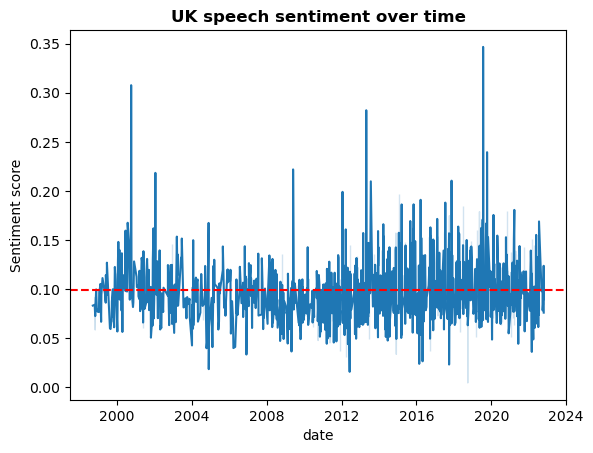

In [630]:
# Plot the Speeches data over time.
sns.lineplot(x='date', y='text_polarity', data=uk_speeches)

# Add a horizontal line for the threshold value.
plt.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Add a title to the plot.
plt.title('UK speech sentiment over time', fontweight='bold')

# Change the y-axis label.
plt.ylabel('Sentiment score')

In [631]:
# Create a subset of the UK index (FTSE100) based on the start and end dates of the UK speeches.
ftse_filtered = ftse_data[(ftse_data['Date'] >= start_date_uk)\
                          & (ftse_data['Date'] <= end_date_uk)]

# View the output of the filtered UK stock index.
ftse_filtered

Date         Open         High          Low        Close  \
3715  1998-09-15  5256.100098  5283.000000  5192.500000  5281.700195   
3716  1998-09-16  5290.200195  5360.600098  5276.799805  5291.700195   
3717  1998-09-17  5273.899902  5273.899902  5101.500000  5132.899902   
3718  1998-09-18  5111.399902  5152.200195  5034.700195  5055.600098   
3719  1998-09-21  5047.200195  5047.200195  4899.600098  4990.299805   
...          ...          ...          ...          ...          ...   
9797  2022-10-14  6850.299805  6976.299805  6850.299805  6858.799805   
9798  2022-10-17  6858.799805  6959.700195  6850.399902  6920.200195   
9799  2022-10-18  6920.200195  7017.399902  6920.200195  6936.700195   
9800  2022-10-19  6936.700195  6968.299805  6890.700195  6925.000000   
9801  2022-10-20  6925.000000  6954.200195  6894.899902  6943.899902   

         Volume  
3715          0  
3716          0  
3717          0  
3718          0  
3719          0  
...         ...  
9797  881210300  
9798  951222700  
9799  932599200  
9800  699543100  
9801  814484300  

[6087 rows x 6 columns]

Text(0, 0.5, '')

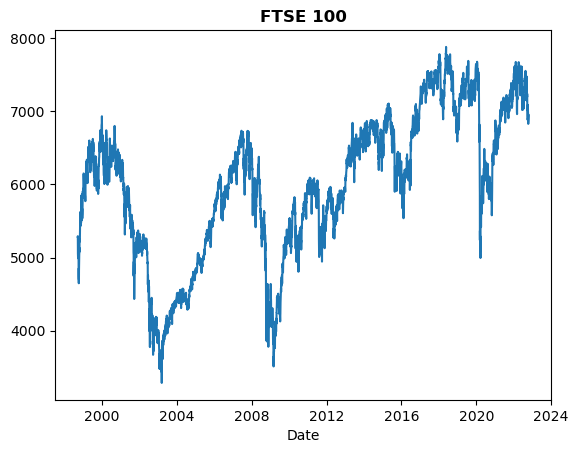

In [632]:
# Plot the FTSE 100.
sns.lineplot(x='Date', y='Close', data=ftse_filtered)

# Add a title to the plot.
plt.title('FTSE 100', fontweight='bold')

# Change the y-axis label.
plt.ylabel('')

In [633]:
# Set the 'date' column as the DataFrame index.
uk_speeches.set_index('date', inplace=True)

# Calculate the monthly moving average of 'text_polarity' using a window of 30 days (assuming a typical month).
uk_speeches['monthly_avg_text_polarity'] = uk_speeches['text_polarity'].rolling(window=30, min_periods=1).mean()

# Reset the index if needed.
uk_speeches.reset_index(inplace=True)

# View the dataframe.
uk_speeches

date     reference location  \
0    1998-09-15  r980915a_BOE       UK   
1    1998-10-21  r981021b_BOE       UK   
2    1998-10-21  r981021a_BOE       UK   
3    1998-11-01  r981101a_BOE       UK   
4    1998-11-01  r981101b_BOE       UK   
...         ...           ...      ...   
1204 2022-10-07  r221007a_BOE       UK   
1205 2022-10-12  r221012a_BOE       UK   
1206 2022-10-15  r221015a_BOE       UK   
1207 2022-10-19  r221019a_BOE       UK   
1208 2022-10-20  r221020a_BOE       UK   

                                                  title     author  is_gov  \
0                                                Speech     george       0   
1                                     Britain in Europe     george       0   
2     Impact of the recent turbulence in internation...       king       1   
3           Economic policy, with and without forecasts       budd       0   
4     Inflation targeting in practice: the UK experi...    vickers       0   
...                                                 ...        ...     ...   
1204         Shocks, inflation, and the policy response    ramsden       0   
1205    Monetary policy: an anchor in challenging times       pill       0   
1206  Monetary policy and financial stability interv...     bailey       1   
1207  Governance of “Decentralised” Finance: Get up,...    wilkins       0   
1208       The inflationary consequences of real shocks  broadbent       0   

                                                   text  text_polarity  \
0     thank you chairman im actually very pleased to...       0.083288   
1     its a great pleasure to be here in the beautif...       0.076711   
2     few industries have suffered more from volatil...       0.091432   
3     my topic this evening is the use of forecasts ...       0.086707   
4     six years ago this week sterling left the exch...       0.058467   
...                                                 ...            ...   
1204  thank you very much for the invitation to spea...       0.102899   
1205  huw pill talks about how we will bring inflati...       0.089167   
1206  we are meeting in the most difficult of times ...       0.104092   
1207  these are divided into seven categories suffra...       0.123791   
1208  between them the covid19 pandemic and russias ...       0.076100   

     Sentiment  monthly_avg_text_polarity  
0      Neutral                   0.083288  
1      Neutral                   0.080000  
2      Neutral                   0.083810  
3      Neutral                   0.084535  
4      Neutral                   0.079321  
...        ...                        ...  
1204  Positive                   0.096926  
1205   Neutral                   0.097415  
1206  Positive                   0.098064  
1207  Positive                   0.098865  
1208   Neutral                   0.098905  

[1209 rows x 10 columns]

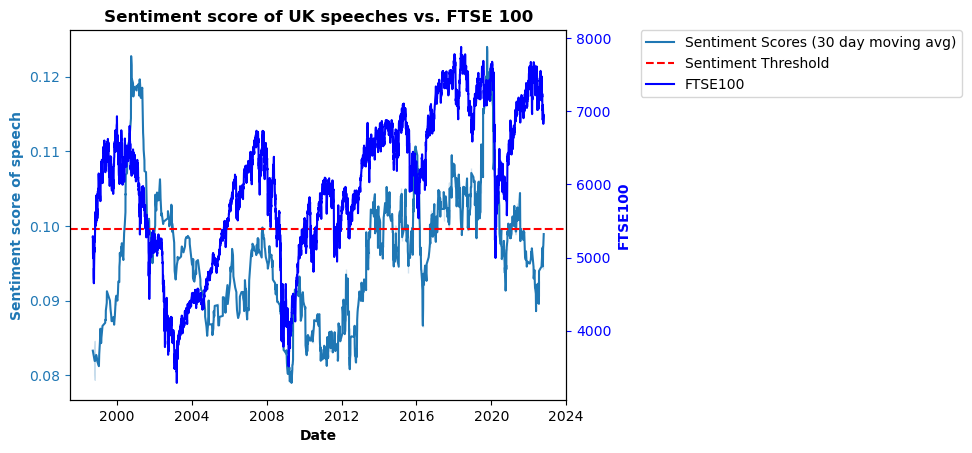

In [634]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=uk_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(ftse_filtered['Date'], ftse_filtered['Close'], color='blue', label='FTSE100')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('FTSE100', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of UK speeches vs. FTSE 100', fontweight='bold')

# Show the plot.
plt.show()

#### For the US

In [635]:
# Create a subset for the US speeches.
us_speeches = speeches[speeches['location'] == 'US']

# Find the minimum and maximum dates in the subset.
start_date_us = us_speeches['date'].min()
end_date_us = us_speeches['date'].max()
print("Start date of US speeches:", start_date_us.date())
print("End date of US speeches:",end_date_us.date())

Start date of US speeches: 1997-01-05
End date of US speeches: 2022-10-20


In [636]:
# Verify that the dataframe has been filtered.
us_speeches['location'].value_counts()

US    1551
Name: location, dtype: int64

Text(0, 0.5, 'Sentiment score')

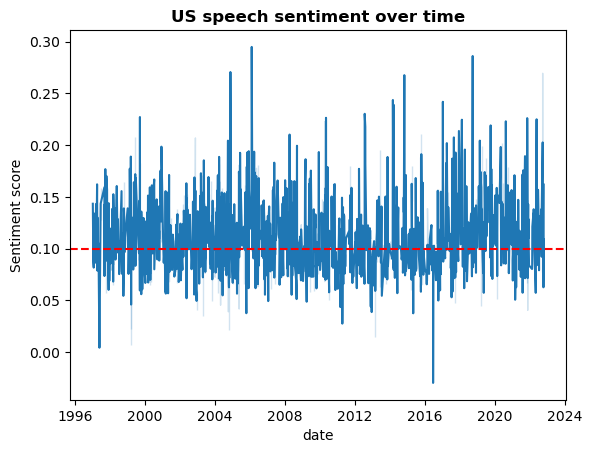

In [637]:
# Plot the Speeches data over time.
sns.lineplot(x='date', y='text_polarity', data=us_speeches)

# Add a horizontal line for the threshold value.
plt.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Add a title to the plot.
plt.title('US speech sentiment over time', fontweight='bold')

# Change the y-axis label.
plt.ylabel('Sentiment score')

In [638]:
# Create a subset of the US index (S&P500) based on the start and end dates of the US speeches.
sp500_filtered = sp500_data[(sp500_data['Date'] >= start_date_us)\
                          & (sp500_data['Date'] <= end_date_us)]

# View the output of the filtered US stock index.
sp500_filtered

Date         Open         High          Low        Close  \
17323  1997-01-06   748.030029   753.309998   743.820007   747.650024   
17324  1997-01-07   747.650024   753.260010   742.179993   753.229980   
17325  1997-01-08   753.229980   755.719971   747.710022   748.409973   
17326  1997-01-09   748.409973   757.679993   748.409973   754.849976   
17327  1997-01-10   754.849976   759.650024   746.919983   759.500000   
...           ...          ...          ...          ...          ...   
23811  2022-10-14  3690.409912  3712.000000  3579.679932  3583.070068   
23812  2022-10-17  3638.649902  3689.729980  3638.649902  3677.949951   
23813  2022-10-18  3746.260010  3762.790039  3686.530029  3719.979980   
23814  2022-10-19  3703.110107  3728.580078  3666.510010  3695.159912   
23815  2022-10-20  3689.050049  3736.000000  3656.439941  3665.780029   

           Volume  
17323   531350000  
17324   538220000  
17325   557510000  
17326   555370000  
17327   545850000  
...           ...  
23811  4243030000  
23812  4352780000  
23813  4483740000  
23814  4223800000  
23815  4496620000  

[6493 rows x 6 columns]

Text(0, 0.5, '')

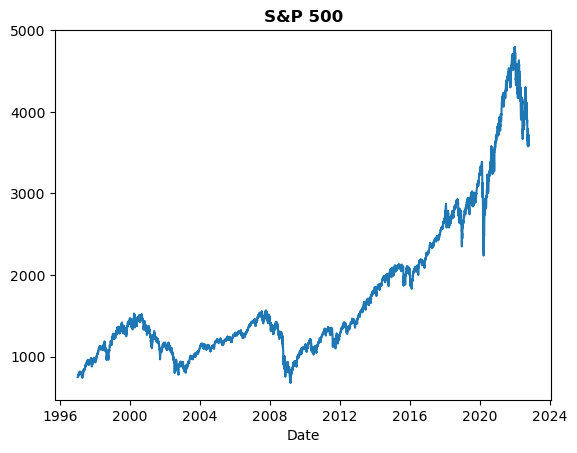

In [639]:
# Plot the S&P 500.
sns.lineplot(x='Date', y='Close', data=sp500_filtered)

# Add a title to the plot.
plt.title('S&P 500', fontweight='bold')

# Change the y-axis label.
plt.ylabel('')

In [640]:
# Set the 'date' column as the DataFrame index.
us_speeches.set_index('date', inplace=True)

# Calculate the monthly moving average of 'text_polarity' using a window of 30 days (assuming a typical month).
us_speeches['monthly_avg_text_polarity'] = us_speeches['text_polarity'].rolling(window=30, min_periods=1).mean()

# Reset the index if needed.
us_speeches.reset_index(inplace=True)

# View the dataframe.
us_speeches

date      reference location  \
0    1997-01-05  r970105a_FOMC       US   
1    1997-01-14  r970114a_FOMC       US   
2    1997-01-16  r970116a_FOMC       US   
3    1997-01-24  r970124a_FOMC       US   
4    1997-01-28  r970128a_FOMC       US   
...         ...            ...      ...   
1546 2022-10-10  r221010a_FOMC       US   
1547 2022-10-12  r221012a_FOMC       US   
1548 2022-10-12  r221012b_FOMC       US   
1549 2022-10-14  r221014a_FOMC       US   
1550 2022-10-20  r221020a_FOMC       US   

                                                  title     author  is_gov  \
0     I. Structural Models and Monetary Policy Analysis      meyer       0   
1                              National Bank of Belgium  greenspan       1   
2                          Balanced Risks Going Forward      meyer       0   
3                                            Activities      meyer       0   
4                                                should   phillips       0   
...                                                 ...        ...     ...   
1546  Restoring Price Stability in an Uncertain Econ...   brainard       0   
1547  Forward Guidance as a Monetary Policy Tool: Co...     bowman       0   
1548  Managing the Promise and Risk of Financial Inn...       barr       0   
1549  The U.S. Dollar and Central Bank Digital Curre...     waller       0   
1550                                  Welcoming Remarks     bowman       0   

                                                   text  text_polarity  \
0     i am in the middle of my third interesting and...       0.143431   
1     mr prime minister minister of finance minister...       0.097735   
2     measured on a fourth quarter to fourth quarter...       0.086801   
3     my topic this morning is financial modernizati...       0.081673   
4     good afternoon it is a pleasure to be here tod...       0.134114   
...                                                 ...            ...   
1546  it is a pleasure to join this discussion today...       0.069278   
1547  thanks to the money marketeers for inviting me...       0.113576   
1548  thank you chris and thank you for the invitati...       0.105436   
1549  thank you professor jackson and thank you to t...       0.062647   
1550  welcome and thank you for joining us to discus...       0.161958   

     Sentiment  monthly_avg_text_polarity  
0     Positive                   0.143431  
1      Neutral                   0.120583  
2      Neutral                   0.109322  
3      Neutral                   0.102410  
4     Positive                   0.108751  
...        ...                        ...  
1546   Neutral                   0.121345  
1547  Positive                   0.120665  
1548  Positive                   0.120119  
1549   Neutral                   0.117603  
1550  Positive                   0.119593  

[1551 rows x 10 columns]

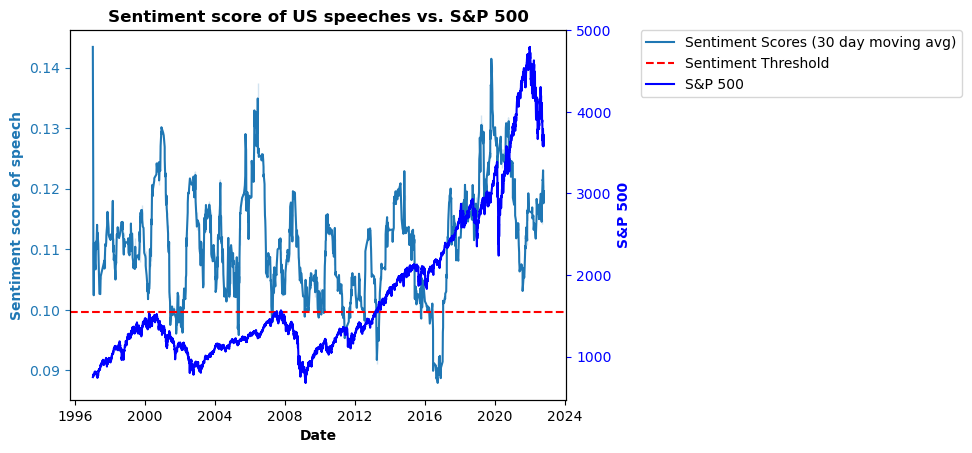

In [641]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=us_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(sp500_filtered['Date'], sp500_filtered['Close'], color='blue', label='S&P 500')

# Set labels for the axes with bold font and match colors
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('S&P 500', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of US speeches vs. S&P 500', fontweight='bold')

# Show the plot.
plt.show()

#### For AUS

In [642]:
# Create a subset for the AUS speeches.
aus_speeches = speeches[speeches['location'] == 'AUS']

# Find the minimum and maximum dates in the subset.
start_date_aus = aus_speeches['date'].min()
end_date_aus = aus_speeches['date'].max()
print("Start date of AUS speeches:", start_date_aus.date())
print("End date of AUS speeches:",end_date_aus.date())

Start date of AUS speeches: 1990-11-28
End date of AUS speeches: 2022-11-01


In [643]:
# Verify that the dataframe has been filtered.
aus_speeches['location'].value_counts()

AUS    284
Name: location, dtype: int64

Text(0, 0.5, 'Sentiment score')

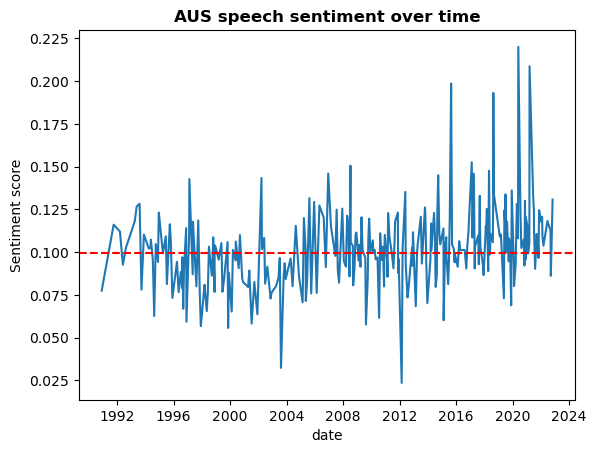

In [644]:
# Plot the Speeches data over time.
sns.lineplot(x='date', y='text_polarity', data=aus_speeches)

# Add a horizontal line for the threshold value.
plt.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Add a title to the plot.
plt.title('AUS speech sentiment over time', fontweight='bold')

# Change the y-axis label.
plt.ylabel('Sentiment score')

In [645]:
# Create a subset of the AUS index (ASX 200) based on the start and end dates of the AUS speeches.
asx200_filtered = asx200_data[(asx200_data['Date'] >= start_date_aus)\
                          & (asx200_data['Date'] <= end_date_aus)]

# View the output of the filtered AUS stock index.
asx200_filtered

Date         Open         High          Low        Close   Volume
0     1992-11-23  1455.000000  1455.000000  1455.000000  1455.000000        0
1     1992-11-24  1458.400024  1458.400024  1458.400024  1458.400024        0
2     1992-11-25  1467.900024  1467.900024  1467.900024  1467.900024        0
3     1992-11-26  1459.000000  1459.000000  1459.000000  1459.000000        0
4     1992-11-27  1458.900024  1458.900024  1458.900024  1458.900024        0
...          ...          ...          ...          ...          ...      ...
7564  2022-10-26  6809.000000  6843.200195  6800.799805  6810.899902   821000
7565  2022-10-27  6829.600098  6873.799805  6824.299805  6845.100098   779800
7566  2022-10-28  6827.000000  6827.000000  6776.000000  6785.700195   784100
7567  2022-10-31  6786.700195  6869.200195  6786.700195  6863.500000  1019200
7568  2022-11-01  6866.500000  6976.899902  6858.200195  6976.899902   701300

[7569 rows x 6 columns]

Text(0, 0.5, '')

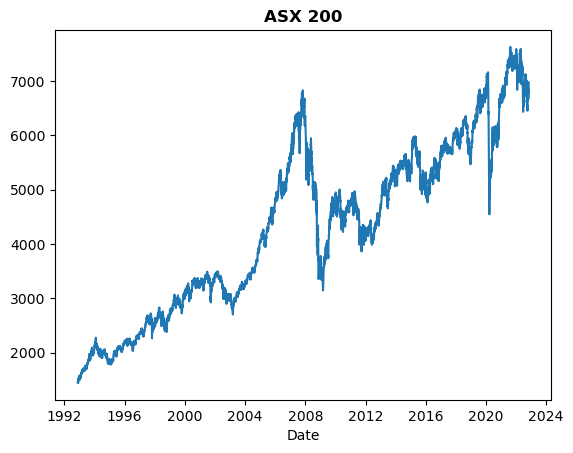

In [646]:
# Plot the ASX 200.
sns.lineplot(x='Date', y='Close', data=asx200_filtered)

# Add a title to the plot.
plt.title('ASX 200', fontweight='bold')

# Change the y-axis label.
plt.ylabel('')

In [647]:
# Set the 'date' column as the DataFrame index.
aus_speeches.set_index('date', inplace=True)

# Calculate the monthly moving average of 'text_polarity' using a window of 30 days (assuming a typical month).
aus_speeches['monthly_avg_text_polarity'] = aus_speeches['text_polarity'].rolling(window=30, min_periods=1).mean()

# Reset the index if needed.
aus_speeches.reset_index(inplace=True)

# View the dataframe.
aus_speeches

date     reference location  \
0   1990-11-28  r901128a_BOA      AUS   
1   1991-10-03  r911003a_BOA      AUS   
2   1992-03-14  r920314a_BOA      AUS   
3   1992-05-29  r920529a_BOA      AUS   
4   1992-08-17  r920817a_BOA      AUS   
..         ...           ...      ...   
279 2022-03-09  r220309a_BOA      AUS   
280 2022-06-21  r220621a_BOA      AUS   
281 2022-09-08  r220908a_BOA      AUS   
282 2022-09-16  r220916a_BOA      AUS   
283 2022-11-01  r221101a_BOA      AUS   

                                                 title  author  is_gov  \
0                    A Proper Role for Monetary Policy  fraser       0   
1                                                       fraser       0   
2                                                       fraser       0   
3                                                       fraser       0   
4                                                       fraser       0   
..                                                 ...     ...     ...   
279                       Recent Economic Developments    lowe       1   
280                      Inflation and Monetary Policy    lowe       1   
281          Inflation and the Monetary Policy Fram...    lowe       1   
282          Opening Statement to the House of Repr...    lowe       1   
283           Remarks at the Reserve Bank Board Dinner    lowe       1   

                                                  text  text_polarity  \
0    they would no doubt argue that to have two obj...       0.077493   
1    today i wish to talk about real interest rates...       0.116070   
2    i welcome this opportunity to talk about prosp...       0.112064   
3    it is a pleasure to have this opportunity to a...       0.092684   
4    as a longtime fan of don sanders i am delighte...       0.102694   
..                                                 ...            ...   
279  thank you for the invitation to participate in...       0.103789   
280  i would like to thank amcham for the invitatio...       0.118267   
281  i would like to begin by thanking everybody wh...       0.112641   
282  inflation is then expected to start declining ...       0.086176   
283  good evening on behalf of the reserve bank boa...       0.130802   

    Sentiment  monthly_avg_text_polarity  
0     Neutral                   0.077493  
1    Positive                   0.096781  
2    Positive                   0.101876  
3     Neutral                   0.099578  
4    Positive                   0.100201  
..        ...                        ...  
279  Positive                   0.116262  
280  Positive                   0.117204  
281  Positive                   0.118286  
282   Neutral                   0.118086  
283  Positive                   0.118173  

[284 rows x 10 columns]

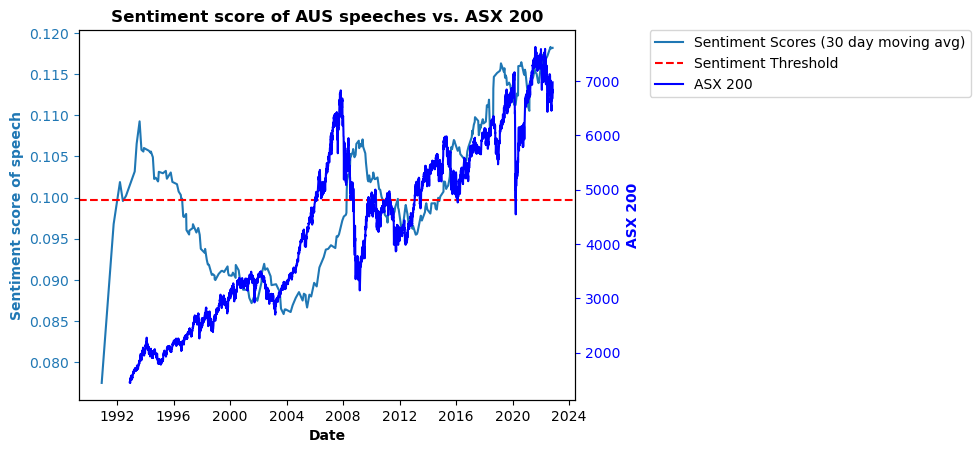

In [648]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=aus_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(asx200_filtered['Date'], asx200_filtered['Close'], color='blue', label='ASX 200')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match colour to line1.
ax2.set_ylabel('ASX 200', color=line2.get_color(), fontweight='bold')  # Match colour to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of AUS speeches vs. ASX 200', fontweight='bold')

# Show the plot.
plt.show()

#### For CAN

In [649]:
# Create a subset for the CAN speeches.
can_speeches = speeches[speeches['location'] == 'CAN']

# Find the minimum and maximum dates in the subset.
start_date_can = can_speeches['date'].min()
end_date_can = can_speeches['date'].max()
print("Start date of CAN speeches:", start_date_can.date())
print("End date of CAN speeches:",end_date_can.date())

Start date of CAN speeches: 1997-05-30
End date of CAN speeches: 2022-11-02


In [650]:
# Verify that the dataframe has been filtered.
can_speeches['location'].value_counts()

CAN    620
Name: location, dtype: int64

Text(0, 0.5, 'Sentiment score')

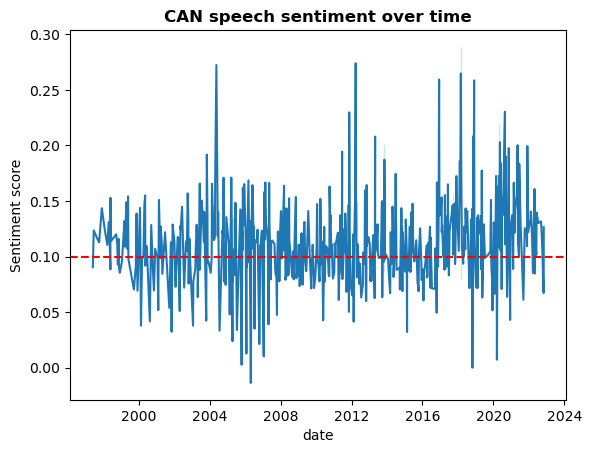

In [651]:
# Plot the Speeches data over time.
sns.lineplot(x='date', y='text_polarity', data=can_speeches)

# Add a horizontal line for the threshold value.
plt.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Add a title to the plot.
plt.title('CAN speech sentiment over time', fontweight='bold')

# Change the y-axis label.
plt.ylabel('Sentiment score')

In [652]:
# Create a subset of the CAN index (TSX) based on the start and end dates of the CAN speeches.
tsx_filtered = tsx_data[(tsx_data['Date'] >= start_date_can)\
                          & (tsx_data['Date'] <= end_date_can)]

# View the output of the filtered CAN stock index.
tsx_filtered

Date          Open          High           Low         Close  \
4495   1997-05-30   6316.000000   6383.700195   6316.000000   6382.100098   
4496   1997-06-02   6403.399902   6409.600098   6388.799805   6406.100098   
4497   1997-06-03   6409.799805   6437.399902   6409.299805   6432.700195   
4498   1997-06-04   6423.700195   6444.299805   6423.700195   6428.600098   
4499   1997-06-05   6437.799805   6474.600098   6437.799805   6449.500000   
...           ...           ...           ...           ...           ...   
10879  2022-10-27  19391.099609  19516.400391  19316.599609  19352.099609   
10880  2022-10-28  19365.099609  19471.300781  19282.699219  19471.199219   
10881  2022-10-31  19406.500000  19510.900391  19402.099609  19426.099609   
10882  2022-11-01  19674.900391  19698.300781  19496.300781  19517.699219   
10883  2022-11-02  19490.800781  19669.400391  19277.000000  19277.000000   

          Volume  
4495    53870500  
4496    37359300  
4497    50699400  
4498    59722000  
4499    56900600  
...          ...  
10879  223826400  
10880  198107200  
10881  262561400  
10882  178366400  
10883  290685300  

[6389 rows x 6 columns]

Text(0, 0.5, '')

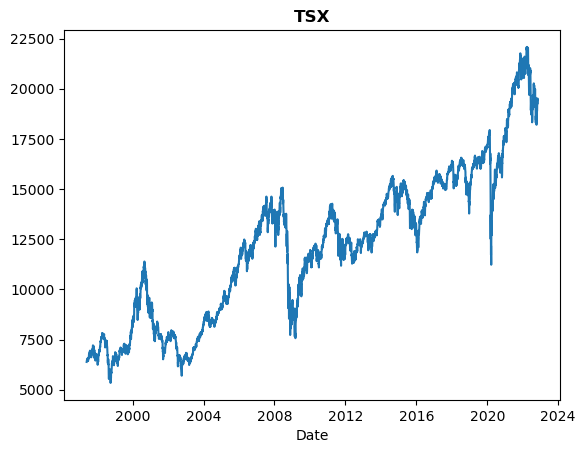

In [653]:
# Plot the TSX.
sns.lineplot(x='Date', y='Close', data=tsx_filtered)

# Add a title to the plot.
plt.title('TSX', fontweight='bold')

# Change the y-axis label.
plt.ylabel('')

In [654]:
# Set the 'date' column as the DataFrame index.
can_speeches.set_index('date', inplace=True)

# Calculate the monthly moving average of 'text_polarity' using a window of 30 days (assuming a typical month).
can_speeches['monthly_avg_text_polarity'] = can_speeches['text_polarity'].rolling(window=30, min_periods=1).mean()

# Reset the index if needed.
can_speeches.reset_index(inplace=True)

# View the dataframe.
can_speeches

date     reference location  \
0   1997-05-30  r970530a_BOC      CAN   
1   1997-06-18  r970618a_BOC      CAN   
2   1997-09-16  r970916a_BOC      CAN   
3   1997-10-07  r971007a_BOC      CAN   
4   1997-12-01  r971201a_BOC      CAN   
..         ...           ...      ...   
615 2022-09-20  r220920a_BOC      CAN   
616 2022-10-06  r221006a_BOC      CAN   
617 2022-10-26  r221026a_BOC      CAN   
618 2022-11-01  r221101a_BOC      CAN   
619 2022-11-02  r221102a_BOC      CAN   

                                                 title    author  is_gov  \
0    Flexible Exchange Rates in a World of Low Infl...  thiessen       1   
1       The Canadian economy: Challenges and prospects  thiessen       1   
2    The recent economic record in Canada and the c...  thiessen       1   
3                 Challenges ahead for monetary policy  thiessen       1   
4    What can monetary policy do to help the econom...  thiessen       1   
..                                                 ...       ...     ...   
615  Macroeconomics of the 2020s:  What we’ve learn...   beaudry       0   
616   What’s happening to inflation and why it matters   macklem       1   
617  Monetary Policy Report Press Conference Openin...   macklem       1   
618  Opening Statement before the Standing Senate C...   macklem       1   
619                 Preparing for payments supervision    morrow       0   

                                                  text  text_polarity  \
0    there is a good deal of discussion these days ...       0.090482   
1    once a year the bank of canadas board of direc...       0.123474   
2    it has been a little over two years since my l...       0.114513   
3    today i would like to talk about some of the i...       0.112780   
4    today we meet against a backdrop of some uncer...       0.143504   
..                                                 ...            ...   
615  good afternoon and thank you for inviting me t...       0.120796   
616  governor of the bank of canada good afternoon ...       0.104224   
617  governor of the bank of canada press conferenc...       0.069676   
618  governor of the bank of canada and the economy...       0.067256   
619  good morning and thank you for inviting me to ...       0.126473   

    Sentiment  monthly_avg_text_polarity  
0     Neutral                   0.090482  
1    Positive                   0.106978  
2    Positive                   0.109489  
3    Positive                   0.110312  
4    Positive                   0.116951  
..        ...                        ...  
615  Positive                   0.128600  
616  Positive                   0.128742  
617   Neutral                   0.124947  
618   Neutral                   0.122897  
619  Positive                   0.125075  

[620 rows x 10 columns]

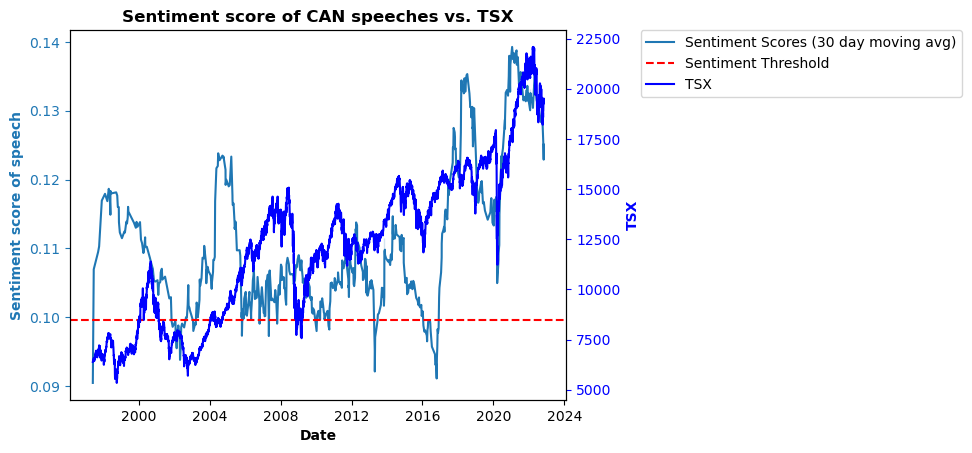

In [655]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=can_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(tsx_filtered['Date'], tsx_filtered['Close'], color='blue', label='TSX')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('TSX', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of CAN speeches vs. TSX', fontweight='bold')

# Show the plot.
plt.show()

#### For JPN

In [656]:
# Create a subset for the JPN speeches.
jpn_speeches = speeches[speeches['location'] == 'JPN']

# Find the minimum and maximum dates in the subset.
start_date_jpn = jpn_speeches['date'].min()
end_date_jpn = jpn_speeches['date'].max()
print("Start date of JPN speeches:", start_date_jpn.date())
print("End date of JPN speeches:",end_date_jpn.date())

Start date of JPN speeches: 1997-02-04
End date of JPN speeches: 2022-10-19


In [657]:
# Verify that the dataframe has been filtered.
jpn_speeches['location'].value_counts()

JPN    755
Name: location, dtype: int64

Text(0, 0.5, 'Sentiment score')

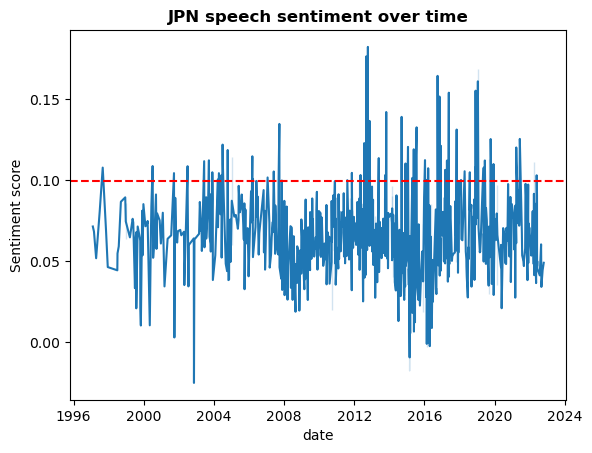

In [658]:
# Plot the Speeches data over time.
sns.lineplot(x='date', y='text_polarity', data=jpn_speeches)

# Add a horizontal line for the threshold value.
plt.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Add a title to the plot.
plt.title('JPN speech sentiment over time', fontweight='bold')

# Change the y-axis label.
plt.ylabel('Sentiment score')

In [659]:
# Create a subset of the JPN index (Nikkei 225) based on the start and end dates of the JPN speeches.
nikkei_filtered = nikkei_data[(nikkei_data['Date'] >= start_date_jpn)\
                          & (nikkei_data['Date'] <= end_date_jpn)]

# View the output of the filtered JPN stock index.
nikkei_filtered

Date          Open          High           Low         Close  \
7909   1997-02-04  18158.320312  18629.269531  18158.320312  18314.330078   
7910   1997-02-05  18302.560547  18307.349609  17901.480469  18185.970703   
7911   1997-02-06  18199.640625  18257.039062  17875.220703  18038.429688   
7912   1997-02-07  18071.570312  18266.619141  17792.470703  17867.039062   
7913   1997-02-10  17881.910156  18268.320312  17843.380859  18181.169922   
...           ...           ...           ...           ...           ...   
14207  2022-10-13  26398.289062  26408.310547  26237.419922  26237.419922   
14208  2022-10-14  26599.320312  27180.160156  26595.349609  27090.759766   
14209  2022-10-17  26785.019531  26814.919922  26649.130859  26775.789062   
14210  2022-10-18  27167.730469  27229.880859  26910.099609  27156.140625   
14211  2022-10-19  27225.169922  27371.380859  27192.789062  27257.380859   

         Volume  
7909          0  
7910          0  
7911          0  
7912          0  
7913          0  
...         ...  
14207  59200000  
14208  82400000  
14209  65300000  
14210  66100000  
14211  57600000  

[6303 rows x 6 columns]

Text(0, 0.5, '')

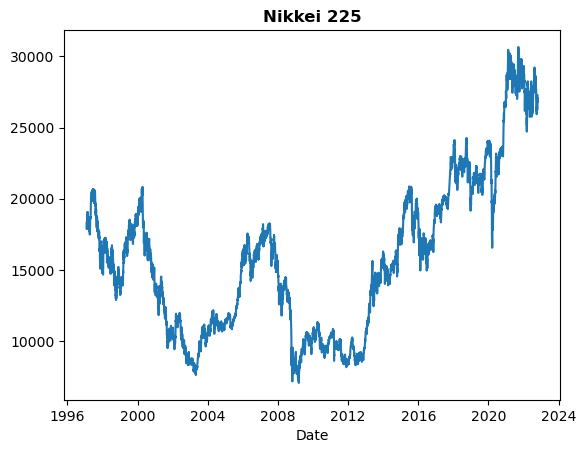

In [660]:
# Plot the nikkei.
sns.lineplot(x='Date', y='Close', data=nikkei_filtered)

# Add a title to the plot.
plt.title('Nikkei 225', fontweight='bold')

# Change the y-axis label.
plt.ylabel('')

In [661]:
# Set the 'date' column as the DataFrame index.
jpn_speeches.set_index('date', inplace=True)

# Calculate the monthly moving average of 'text_polarity' using a window of 30 days (assuming a typical month).
jpn_speeches['monthly_avg_text_polarity'] = jpn_speeches['text_polarity'].rolling(window=30, min_periods=1).mean()

# Reset the index if needed.
jpn_speeches.reset_index(inplace=True)

# View the dataframe.
jpn_speeches

date     reference location  \
0   1997-02-04  r970204a_BOJ      JPN   
1   1997-02-28  r970228a_BOJ      JPN   
2   1997-04-14  r970414a_BOJ      JPN   
3   1997-06-27  r970627a_BOJ      JPN   
4   1997-08-29  r970829a_BOJ      JPN   
..         ...           ...      ...   
750 2022-07-28  r220728a_BOJ      JPN   
751 2022-08-25  r220825a_BOJ      JPN   
752 2022-08-31  r220831a_BOJ      JPN   
753 2022-09-26  r220926a_BOJ      JPN   
754 2022-10-19  r221019a_BOJ      JPN   

                                                 title      author  is_gov  \
0     Recent Monetary and Economic Conditions in Japan  matsushita       0   
1    Payment and Settlement Systems: The Current Is...  matsushita       0   
2    Recent Monetary and Economic Conditions in Jap...  matsushita       0   
3    A New Framework of Monetary Policy under the N...  matsushita       0   
4                             Foreword by the Governor    governor       0   
..                                                 ...         ...     ...   
750                Japan's Economy and Monetary Policy     amamiya       0   
751  Economic Activity, Prices, and Monetary Policy...    nakamura       0   
752  Economic Activity, Prices, and Monetary Policy...    nakagawa       0   
753               Japan's Economy and Monetary Policy       kuroda       1   
754  Economic Activity, Prices, and Monetary Policy...      adachi       0   

                                                  text  text_polarity  \
0    i truly appreciate this opportunity to address...       0.071556   
1    this article is excerpted and translated from ...       0.068413   
2    this article is excerpted and translated from ...       0.051964   
3    this article is excerpted and translated from ...       0.080746   
4    it is a pleasure to be able to bring to you th...       0.107885   
..                                                 ...            ...   
750  it is my pleasure to have the opportunity toda...       0.041406   
751  i will begin my speech by talking about recent...       0.060531   
752  i would like to begin my speech by talking abo...       0.034282   
753  it is my great pleasure to have the opportunit...       0.044572   
754  first i would like to touch on developments re...       0.049170   

    Sentiment  monthly_avg_text_polarity  
0     Neutral                   0.071556  
1     Neutral                   0.069984  
2     Neutral                   0.063978  
3     Neutral                   0.068170  
4    Positive                   0.076113  
..        ...                        ...  
750   Neutral                   0.067245  
751   Neutral                   0.067691  
752   Neutral                   0.067142  
753   Neutral                   0.066694  
754   Neutral                   0.065139  

[755 rows x 10 columns]

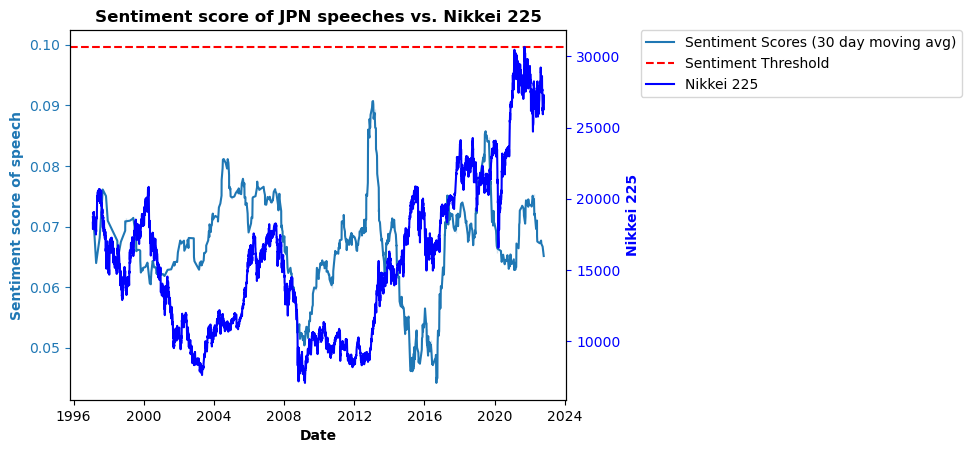

In [662]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=jpn_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(nikkei_filtered['Date'], nikkei_filtered['Close'], color='blue', label='Nikkei 225')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('Nikkei 225', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of JPN speeches vs. Nikkei 225', fontweight='bold')

# Show the plot.
plt.show()

## Plots of speech sentiment vs. volatility over time

### Define function to calculate the Average True Range (ATR)

In [663]:
def calculate_atr(data, period):
    # Calculate True Range (TR).
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))
    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

    # Calculate ATR.
    data['ATR'] = data['TrueRange'].rolling(window=period).mean()

    # Remove the intermediate columns used in the calculation and return the data.
    data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose'], axis=1, inplace=True)
    
    return data

#### For the UK

In [664]:
# Calculate ATR for FTSE 100.
ftse_100_atr = calculate_atr(ftse_data, 30)

# Filter the ATR for the FTSE 100 within the range of the UK speeches dates.
ftse_atr = ftse_100_atr[(ftse_100_atr['Date'] >= start_date_uk)\
                          & (ftse_100_atr['Date'] <= end_date_uk)]

# View the output.
ftse_atr.head()

Date         Open         High          Low        Close  Volume  \
3715  1998-09-15  5256.100098  5283.000000  5192.500000  5281.700195       0   
3716  1998-09-16  5290.200195  5360.600098  5276.799805  5291.700195       0   
3717  1998-09-17  5273.899902  5273.899902  5101.500000  5132.899902       0   
3718  1998-09-18  5111.399902  5152.200195  5034.700195  5055.600098       0   
3719  1998-09-21  5047.200195  5047.200195  4899.600098  4990.299805       0   

       TrueRange         ATR  
3715   90.500000  135.756673  
3716   83.800293  135.076693  
3717  190.200195  135.926693  
3718  117.500000  136.683350  
3719  156.000000  138.616683

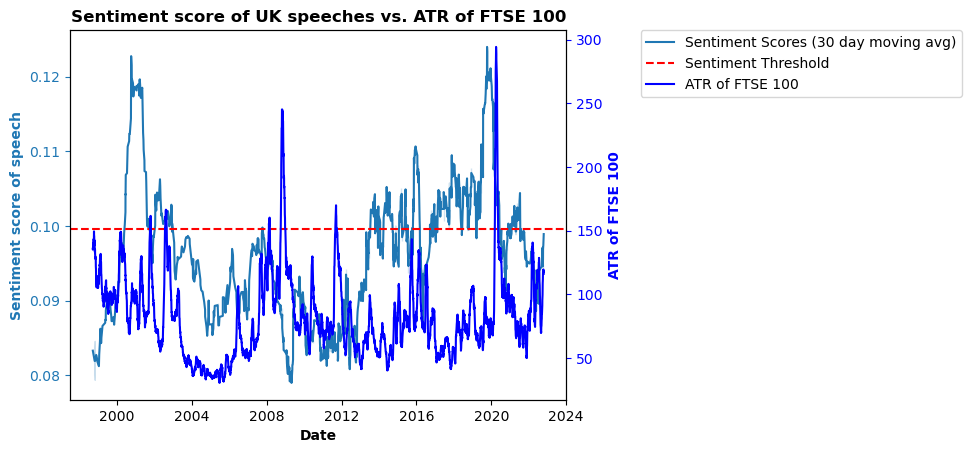

In [665]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=uk_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(ftse_atr['Date'], ftse_atr['ATR'], color='blue', label='ATR of FTSE 100')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('ATR of FTSE 100', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of UK speeches vs. ATR of FTSE 100', fontweight='bold')

# Show the plot.
plt.show()

#### For the US

In [666]:
# Calculate ATR for S&P 500.
sp_500_atr = calculate_atr(sp500_data, 30)

# Filter the ATR for the S&P 500 within the range of the US speeches dates.
sp500_atr = sp_500_atr[(sp_500_atr['Date'] >= start_date_us)\
                          & (sp_500_atr['Date'] <= end_date_us)]

# View the output.
sp500_atr.head()

Date        Open        High         Low       Close     Volume  \
17323  1997-01-06  748.030029  753.309998  743.820007  747.650024  531350000   
17324  1997-01-07  747.650024  753.260010  742.179993  753.229980  538220000   
17325  1997-01-08  753.229980  755.719971  747.710022  748.409973  557510000   
17326  1997-01-09  748.409973  757.679993  748.409973  754.849976  555370000   
17327  1997-01-10  754.849976  759.650024  746.919983  759.500000  545850000   

       TrueRange       ATR  
17323   9.489990  9.146336  
17324  11.080017  9.378337  
17325   8.009949  9.446002  
17326   9.270020  9.453003  
17327  12.730042  9.567672

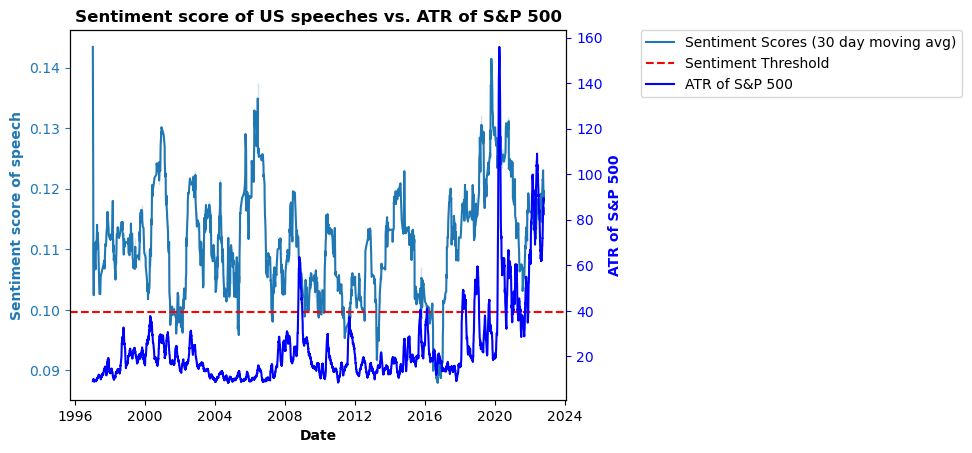

In [667]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=us_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(sp500_atr['Date'], sp500_atr['ATR'], color='blue', label='ATR of S&P 500')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1
ax2.set_ylabel('ATR of S&P 500', color=line2.get_color(), fontweight='bold')  # Match color to line2

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of US speeches vs. ATR of S&P 500', fontweight='bold')

# Show the plot.
plt.show()

In [668]:
# Create a subset of the VIX index based on the start and end dates of the US speeches.
vix_filtered = vix_data[(vix_data['Date'] >= start_date_us)\
                          & (vix_data['Date'] <= end_date_us)]
# View the output.
vix_filtered

Date       Open       High        Low      Close  Volume
1773  1997-01-06  19.840000  20.440001  19.420000  19.889999       0
1774  1997-01-07  20.459999  20.709999  19.309999  19.350000       0
1775  1997-01-08  18.600000  20.530001  18.600000  20.240000       0
1776  1997-01-09  19.990000  21.100000  19.870001  20.910000       0
1777  1997-01-10  20.750000  20.820000  19.510000  19.629999       0
...          ...        ...        ...        ...        ...     ...
8261  2022-10-14  31.889999  32.980000  31.139999  32.020000       0
8262  2022-10-17  32.270000  32.590000  30.700001  31.370001       0
8263  2022-10-18  31.100000  31.930000  30.420000  30.500000       0
8264  2022-10-19  30.940001  31.900000  30.760000  30.760000       0
8265  2022-10-20  31.299999  31.320000  29.760000  29.980000       0

[6493 rows x 6 columns]

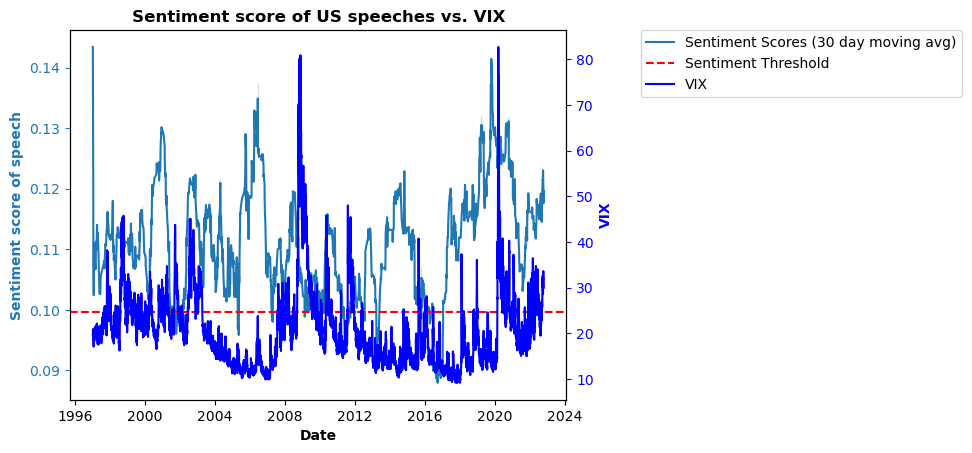

In [669]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=us_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(vix_filtered['Date'], vix_filtered['Close'], color='blue', label='VIX')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('VIX', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of US speeches vs. VIX', fontweight='bold')

# Show the plot.
plt.show()

#### For AUS

In [670]:
# Calculate ATR for ASX 200.
asx_200_atr = calculate_atr(asx200_data, 30)

# Filter the ATR for the ASX 200 within the range of the AUS speeches dates.
asx200_atr = asx_200_atr[(asx_200_atr['Date'] >= start_date_aus)\
                          & (asx_200_atr['Date'] <= end_date_aus)]

# View the output.
asx200_atr

Date         Open         High          Low        Close   Volume  \
0     1992-11-23  1455.000000  1455.000000  1455.000000  1455.000000        0   
1     1992-11-24  1458.400024  1458.400024  1458.400024  1458.400024        0   
2     1992-11-25  1467.900024  1467.900024  1467.900024  1467.900024        0   
3     1992-11-26  1459.000000  1459.000000  1459.000000  1459.000000        0   
4     1992-11-27  1458.900024  1458.900024  1458.900024  1458.900024        0   
...          ...          ...          ...          ...          ...      ...   
7564  2022-10-26  6809.000000  6843.200195  6800.799805  6810.899902   821000   
7565  2022-10-27  6829.600098  6873.799805  6824.299805  6845.100098   779800   
7566  2022-10-28  6827.000000  6827.000000  6776.000000  6785.700195   784100   
7567  2022-10-31  6786.700195  6869.200195  6786.700195  6863.500000  1019200   
7568  2022-11-01  6866.500000  6976.899902  6858.200195  6976.899902   701300   

       TrueRange        ATR  
0       0.000000        NaN  
1       3.400024        NaN  
2       9.500000        NaN  
3       8.900024        NaN  
4       0.099976        NaN  
...          ...        ...  
7564   44.600098  96.480029  
7565   62.899902  91.873356  
7566   69.100098  92.526693  
7567   83.500000  91.756689  
7568  118.699707  94.406689  

[7569 rows x 8 columns]

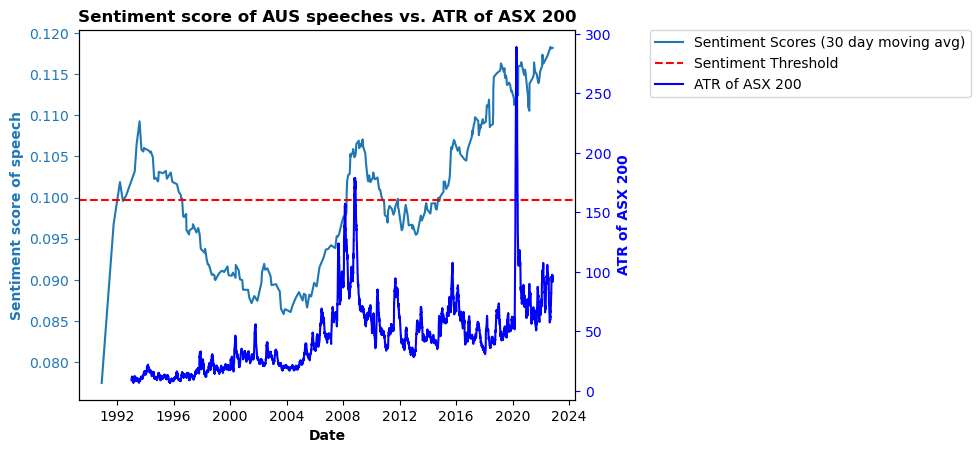

In [671]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=aus_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(asx200_atr['Date'], asx200_atr['ATR'], color='blue', label='ATR of ASX 200')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('ATR of ASX 200', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of AUS speeches vs. ATR of ASX 200', fontweight='bold')

# Show the plot.
plt.show()

#### For CAN

In [672]:
# Calculate ATR for TSX.
tsx_atr = calculate_atr(tsx_data, 30)

# Filter the ATR for the TSX within the range of the CAN speeches dates.
tsx_atr = tsx_atr[(tsx_atr['Date'] >= start_date_can)\
                          & (tsx_atr['Date'] <= end_date_can)]

# View the output.
tsx_atr

Date          Open          High           Low         Close  \
4495   1997-05-30   6316.000000   6383.700195   6316.000000   6382.100098   
4496   1997-06-02   6403.399902   6409.600098   6388.799805   6406.100098   
4497   1997-06-03   6409.799805   6437.399902   6409.299805   6432.700195   
4498   1997-06-04   6423.700195   6444.299805   6423.700195   6428.600098   
4499   1997-06-05   6437.799805   6474.600098   6437.799805   6449.500000   
...           ...           ...           ...           ...           ...   
10879  2022-10-27  19391.099609  19516.400391  19316.599609  19352.099609   
10880  2022-10-28  19365.099609  19471.300781  19282.699219  19471.199219   
10881  2022-10-31  19406.500000  19510.900391  19402.099609  19426.099609   
10882  2022-11-01  19674.900391  19698.300781  19496.300781  19517.699219   
10883  2022-11-02  19490.800781  19669.400391  19277.000000  19277.000000   

          Volume   TrueRange         ATR  
4495    53870500   67.700195   49.733350  
4496    37359300   27.500000   50.193359  
4497    50699400   31.299805   49.626676  
4498    59722000   20.599609   48.366667  
4499    56900600   46.000000   49.023324  
...          ...         ...         ...  
10879  223826400  236.599609  359.456706  
10880  198107200  188.601562  356.950130  
10881  262561400  108.800781  351.343490  
10882  178366400  272.201172  348.050195  
10883  290685300  392.400391  350.610221  

[6389 rows x 8 columns]

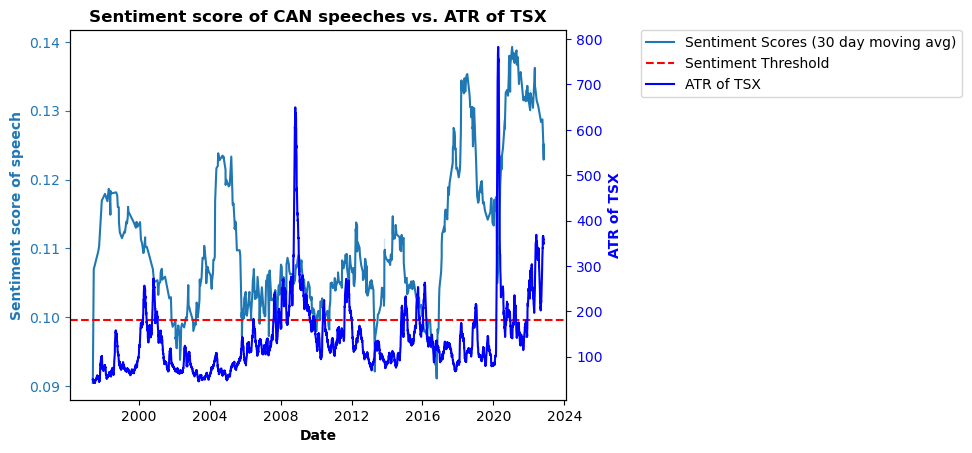

In [673]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=can_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(tsx_atr['Date'], tsx_atr['ATR'], color='blue', label='ATR of TSX')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('ATR of TSX', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of CAN speeches vs. ATR of TSX', fontweight='bold')

# Show the plot.
plt.show()

#### For JPN

In [674]:
# Calculate ATR for TSX.
nikkei_225_atr = calculate_atr(nikkei_data, 30)

# Filter the ATR for the Nikkei 225 within the range of the JPN speeches dates.
nikkei_atr = nikkei_225_atr[(nikkei_225_atr['Date'] >= start_date_jpn)\
                          & (nikkei_225_atr['Date'] <= end_date_jpn)]

# View the output.
nikkei_atr

Date          Open          High           Low         Close  \
7909   1997-02-04  18158.320312  18629.269531  18158.320312  18314.330078   
7910   1997-02-05  18302.560547  18307.349609  17901.480469  18185.970703   
7911   1997-02-06  18199.640625  18257.039062  17875.220703  18038.429688   
7912   1997-02-07  18071.570312  18266.619141  17792.470703  17867.039062   
7913   1997-02-10  17881.910156  18268.320312  17843.380859  18181.169922   
...           ...           ...           ...           ...           ...   
14207  2022-10-13  26398.289062  26408.310547  26237.419922  26237.419922   
14208  2022-10-14  26599.320312  27180.160156  26595.349609  27090.759766   
14209  2022-10-17  26785.019531  26814.919922  26649.130859  26775.789062   
14210  2022-10-18  27167.730469  27229.880859  26910.099609  27156.140625   
14211  2022-10-19  27225.169922  27371.380859  27192.789062  27257.380859   

         Volume   TrueRange         ATR  
7909          0  543.320312  512.930924  
7910          0  412.849609  517.691927  
7911          0  381.818359  519.655208  
7912          0  474.148438  517.519206  
7913          0  424.939453  522.793229  
...         ...         ...         ...  
14207  59200000  170.890625  393.766211  
14208  82400000  942.740234  413.362891  
14209  65300000  441.628906  418.436849  
14210  66100000  454.091797  416.845573  
14211  57600000  215.240234  417.299284  

[6303 rows x 8 columns]

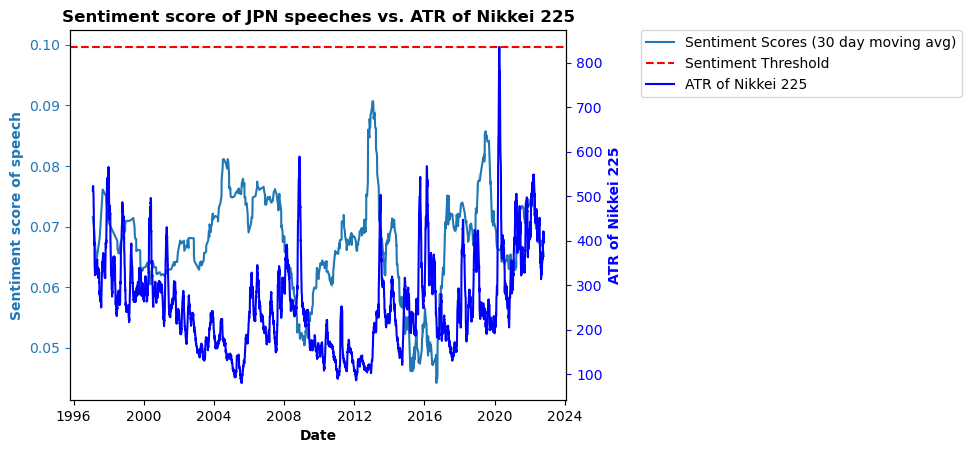

In [675]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=jpn_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(nikkei_atr['Date'], nikkei_atr['ATR'], color='blue', label='ATR of Nikkei 225')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('ATR of Nikkei 225', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of JPN speeches vs. ATR of Nikkei 225', fontweight='bold')

# Show the plot.
plt.show()

## Sentiment vs. year on year (YoY) returns

Following feedback from the Bank of England during the initial presentation, a suggestion was made to use the year-on-year returns to see trends better.

In [676]:
# Create column that'll give the YoY returns of each index.
ftse_filtered['Close_YoY'] = (ftse_filtered['Close'] / ftse_filtered['Close'].shift(365) -1) * 100
sp500_filtered['Close_YoY'] = (sp500_filtered['Close'] / sp500_filtered['Close'].shift(365) -1) * 100
asx200_filtered['Close_YoY'] = (asx200_filtered['Close'] / asx200_filtered['Close'].shift(365) -1) * 100
tsx_filtered['Close_YoY'] = (tsx_filtered['Close'] / tsx_filtered['Close'].shift(365) -1) *100
nikkei_filtered['Close_YoY'] = (nikkei_filtered['Close'] / nikkei_filtered['Close'].shift(365) -1) *100

In [677]:
# View the output of the first index.
ftse_filtered

Date         Open         High          Low        Close  \
3715  1998-09-15  5256.100098  5283.000000  5192.500000  5281.700195   
3716  1998-09-16  5290.200195  5360.600098  5276.799805  5291.700195   
3717  1998-09-17  5273.899902  5273.899902  5101.500000  5132.899902   
3718  1998-09-18  5111.399902  5152.200195  5034.700195  5055.600098   
3719  1998-09-21  5047.200195  5047.200195  4899.600098  4990.299805   
...          ...          ...          ...          ...          ...   
9797  2022-10-14  6850.299805  6976.299805  6850.299805  6858.799805   
9798  2022-10-17  6858.799805  6959.700195  6850.399902  6920.200195   
9799  2022-10-18  6920.200195  7017.399902  6920.200195  6936.700195   
9800  2022-10-19  6936.700195  6968.299805  6890.700195  6925.000000   
9801  2022-10-20  6925.000000  6954.200195  6894.899902  6943.899902   

         Volume  Close_YoY  
3715          0        NaN  
3716          0        NaN  
3717          0        NaN  
3718          0        NaN  
3719          0        NaN  
...         ...        ...  
9797  881210300  -2.564175  
9798  951222700  -2.204573  
9799  932599200  -2.706986  
9800  699543100  -2.789284  
9801  814484300  -0.059011  

[6087 rows x 7 columns]

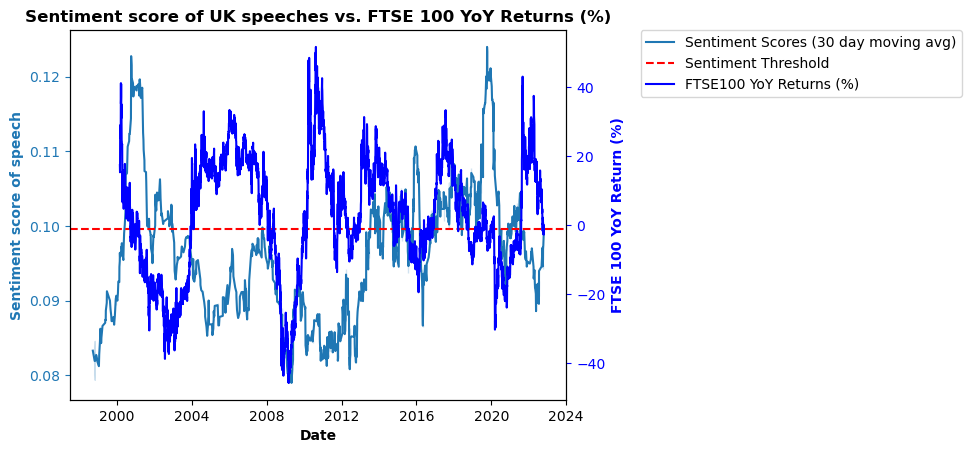

In [678]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=uk_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(ftse_filtered['Date'], ftse_filtered['Close_YoY'], color='blue', label='FTSE100 YoY Returns (%)')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('FTSE 100 YoY Return (%)', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of UK speeches vs. FTSE 100 YoY Returns (%)', fontweight='bold')

# Show the plot.
plt.show()

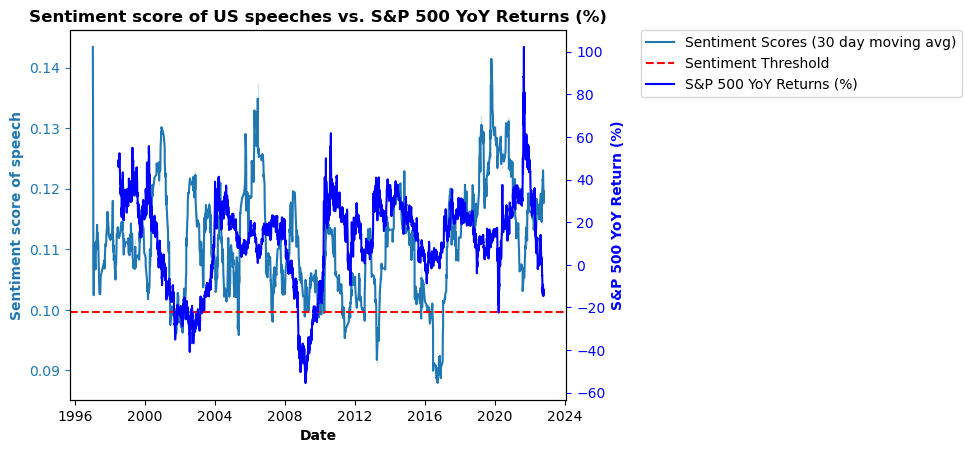

In [679]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=us_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(sp500_filtered['Date'], sp500_filtered['Close_YoY'], color='blue', label='S&P 500 YoY Returns (%)')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('S&P 500 YoY Return (%)', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of US speeches vs. S&P 500 YoY Returns (%)', fontweight='bold')

# Show the plot.
plt.show()

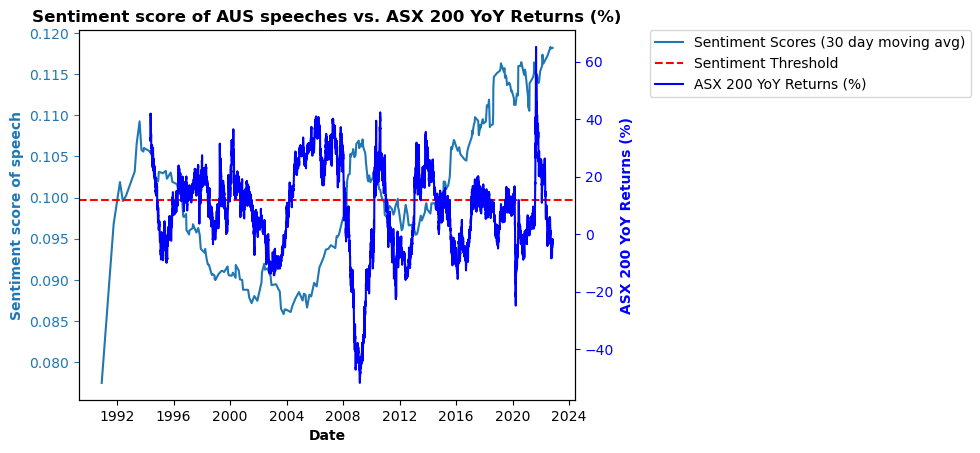

In [680]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=aus_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(asx200_filtered['Date'], asx200_filtered['Close_YoY'], color='blue', label='ASX 200 YoY Returns (%)')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match colour to line1.
ax2.set_ylabel('ASX 200 YoY Returns (%)', color=line2.get_color(), fontweight='bold')  # Match colour to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of AUS speeches vs. ASX 200 YoY Returns (%)', fontweight='bold')

# Show the plot.
plt.show()

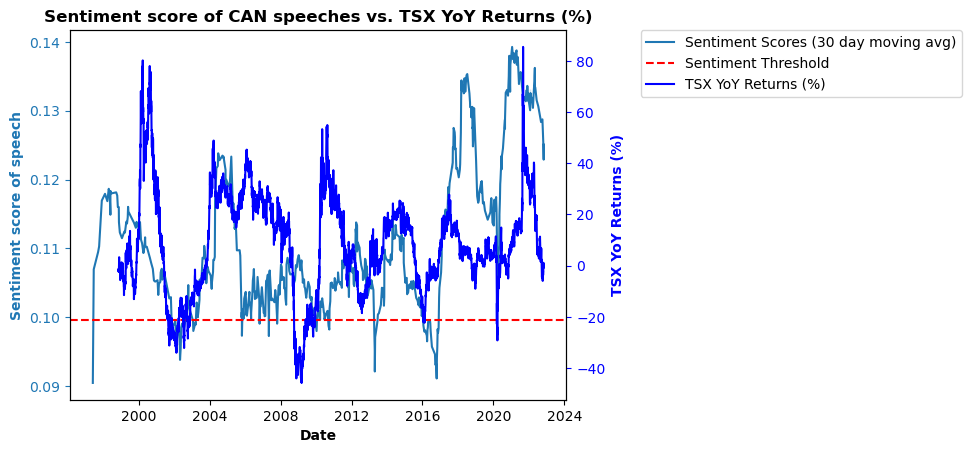

In [681]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=can_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(tsx_filtered['Date'], tsx_filtered['Close_YoY'], color='blue', label='TSX YoY Returns (%)')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('TSX YoY Returns (%)', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of CAN speeches vs. TSX YoY Returns (%)', fontweight='bold')

# Show the plot.
plt.show()

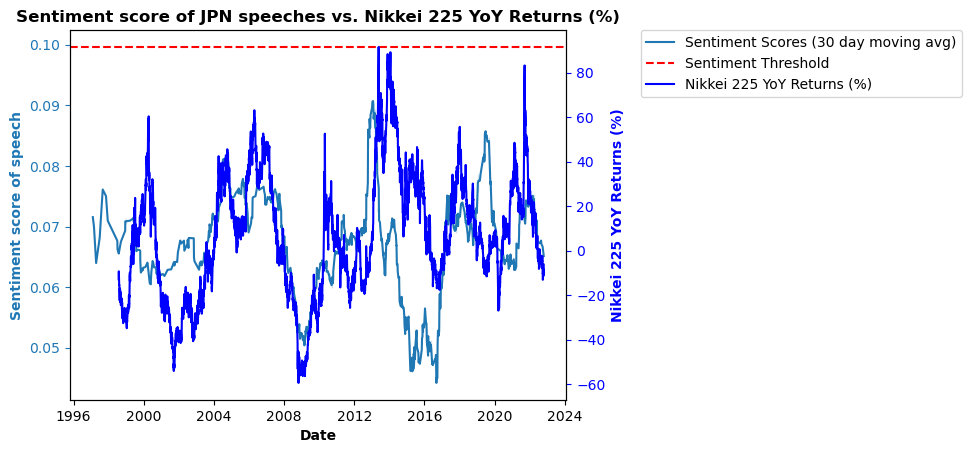

In [682]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=jpn_speeches,\
                     label='Sentiment Scores (30 day moving avg)', ax=ax1)

# Add a horizontal line for the threshold value on the primary y-axis.
ax1.axhline(y=custom_threshold, color='red', linestyle='--', label='Sentiment Threshold')

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(nikkei_filtered['Date'], nikkei_filtered['Close_YoY'], color='blue', label='Nikkei 225 YoY Returns (%)')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of speech', color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('Nikkei 225 YoY Returns (%)', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of JPN speeches vs. Nikkei 225 YoY Returns (%)', fontweight='bold')

# Show the plot.
plt.show()

## Speech sentiment of UK government speakers vs. non-government speakers.

In [683]:
# Filter uk speeches dataframe to show government speeches only.
uk_speeches_is_gov = uk_speeches[uk_speeches['is_gov'] == 1]

In [684]:
# View the output.
uk_speeches_is_gov

date     reference location  \
2    1998-10-21  r981021a_BOE       UK   
17   1999-05-17  r990517a_BOE       UK   
25   1999-08-27  r990827a_BOE       UK   
26   1999-09-09  r990909a_BOE       UK   
29   1999-10-11  r991011a_BOE       UK   
...         ...           ...      ...   
1162 2022-02-10  r220210a_BOE       UK   
1179 2022-05-23  r220523a_BOE       UK   
1191 2022-07-12  r220712a_BOE       UK   
1195 2022-07-19  r220719a_BOE       UK   
1206 2022-10-15  r221015a_BOE       UK   

                                                  title  author  is_gov  \
2     Impact of the recent turbulence in internation...    king       1   
17                                     MPC Two Years On    king       1   
25          Challenges for Monetary Policy: New and Old    king       1   
26    Reforming the International Financial System: ...    king       1   
29                    Interest Rates and the UK Economy    king       1   
...                                                 ...     ...     ...   
1162                       A resilient financial system  bailey       1   
1179      Opening remarks at OeNB monetary policy panel  bailey       1   
1191  The economic landscape: structural change, glo...  bailey       1   
1195  Bringing inflation back to the 2% target, no i...  bailey       1   
1206  Monetary policy and financial stability interv...  bailey       1   

                                                   text  text_polarity  \
2     few industries have suffered more from volatil...       0.091432   
17    present at the creation two years ago when it ...       0.093191   
25    the turn of the millennium seems an appropriat...       0.059402   
26    one of the roles which international financial...       0.066305   
29    twelve months or so ago interest rates were 7 ...       0.099894   
...                                                 ...            ...   
1162  its a pleasure to be here this evening and let...       0.139296   
1179  this is a time of very large economic shocks a...       0.093580   
1191  monetary policy must respond to a multitude of...       0.087353   
1195  lord mayor it is a great pleasure to be here a...       0.150900   
1206  we are meeting in the most difficult of times ...       0.104092   

     Sentiment  monthly_avg_text_polarity  
2      Neutral                   0.083810  
17     Neutral                   0.087357  
25     Neutral                   0.088822  
26     Neutral                   0.087988  
29    Positive                   0.087671  
...        ...                        ...  
1162  Positive                   0.095507  
1179   Neutral                   0.088582  
1191   Neutral                   0.092629  
1195  Positive                   0.093385  
1206  Positive                   0.098064  

[190 rows x 10 columns]

In [685]:
# Calculate the monthly moving average of 'text_polarity' using a window of 30 days (assuming a typical month).
uk_speeches_is_gov['monthly_avg_text_polarity'] = uk_speeches_is_gov['text_polarity'].rolling(window=30, min_periods=1).mean()

# View the dataframe.
uk_speeches_is_gov

date     reference location  \
2    1998-10-21  r981021a_BOE       UK   
17   1999-05-17  r990517a_BOE       UK   
25   1999-08-27  r990827a_BOE       UK   
26   1999-09-09  r990909a_BOE       UK   
29   1999-10-11  r991011a_BOE       UK   
...         ...           ...      ...   
1162 2022-02-10  r220210a_BOE       UK   
1179 2022-05-23  r220523a_BOE       UK   
1191 2022-07-12  r220712a_BOE       UK   
1195 2022-07-19  r220719a_BOE       UK   
1206 2022-10-15  r221015a_BOE       UK   

                                                  title  author  is_gov  \
2     Impact of the recent turbulence in internation...    king       1   
17                                     MPC Two Years On    king       1   
25          Challenges for Monetary Policy: New and Old    king       1   
26    Reforming the International Financial System: ...    king       1   
29                    Interest Rates and the UK Economy    king       1   
...                                                 ...     ...     ...   
1162                       A resilient financial system  bailey       1   
1179      Opening remarks at OeNB monetary policy panel  bailey       1   
1191  The economic landscape: structural change, glo...  bailey       1   
1195  Bringing inflation back to the 2% target, no i...  bailey       1   
1206  Monetary policy and financial stability interv...  bailey       1   

                                                   text  text_polarity  \
2     few industries have suffered more from volatil...       0.091432   
17    present at the creation two years ago when it ...       0.093191   
25    the turn of the millennium seems an appropriat...       0.059402   
26    one of the roles which international financial...       0.066305   
29    twelve months or so ago interest rates were 7 ...       0.099894   
...                                                 ...            ...   
1162  its a pleasure to be here this evening and let...       0.139296   
1179  this is a time of very large economic shocks a...       0.093580   
1191  monetary policy must respond to a multitude of...       0.087353   
1195  lord mayor it is a great pleasure to be here a...       0.150900   
1206  we are meeting in the most difficult of times ...       0.104092   

     Sentiment  monthly_avg_text_polarity  
2      Neutral                   0.091432  
17     Neutral                   0.092312  
25     Neutral                   0.081342  
26     Neutral                   0.077583  
29    Positive                   0.082045  
...        ...                        ...  
1162  Positive                   0.110335  
1179   Neutral                   0.110972  
1191   Neutral                   0.109009  
1195  Positive                   0.109905  
1206  Positive                   0.109335  

[190 rows x 10 columns]

In [686]:
# Filter uk speeches dataframe to show non-government speeches only.
uk_speeches_not_gov = uk_speeches[uk_speeches['is_gov'] == 0]

In [687]:
# View the output.
uk_speeches_not_gov

date     reference location  \
0    1998-09-15  r980915a_BOE       UK   
1    1998-10-21  r981021b_BOE       UK   
3    1998-11-01  r981101a_BOE       UK   
4    1998-11-01  r981101b_BOE       UK   
5    1998-11-19  r981119a_BOE       UK   
...         ...           ...      ...   
1203 2022-10-06  r221006a_BOE       UK   
1204 2022-10-07  r221007a_BOE       UK   
1205 2022-10-12  r221012a_BOE       UK   
1207 2022-10-19  r221019a_BOE       UK   
1208 2022-10-20  r221020a_BOE       UK   

                                                  title     author  is_gov  \
0                                                Speech     george       0   
1                                     Britain in Europe     george       0   
3           Economic policy, with and without forecasts       budd       0   
4     Inflation targeting in practice: the UK experi...    vickers       0   
5                                                Speech     george       0   
...                                                 ...        ...     ...   
1203                            Current monetary policy     haskel       0   
1204         Shocks, inflation, and the policy response    ramsden       0   
1205    Monetary policy: an anchor in challenging times       pill       0   
1207  Governance of “Decentralised” Finance: Get up,...    wilkins       0   
1208       The inflationary consequences of real shocks  broadbent       0   

                                                   text  text_polarity  \
0     thank you chairman im actually very pleased to...       0.083288   
1     its a great pleasure to be here in the beautif...       0.076711   
3     my topic this evening is the use of forecasts ...       0.086707   
4     six years ago this week sterling left the exch...       0.058467   
5     let me put some of the recent newspaper headli...       0.099726   
...                                                 ...            ...   
1203  the current institutional arrangements for mon...       0.084400   
1204  thank you very much for the invitation to spea...       0.102899   
1205  huw pill talks about how we will bring inflati...       0.089167   
1207  these are divided into seven categories suffra...       0.123791   
1208  between them the covid19 pandemic and russias ...       0.076100   

     Sentiment  monthly_avg_text_polarity  
0      Neutral                   0.083288  
1      Neutral                   0.080000  
3      Neutral                   0.084535  
4      Neutral                   0.079321  
5     Positive                   0.082722  
...        ...                        ...  
1203   Neutral                   0.095520  
1204  Positive                   0.096926  
1205   Neutral                   0.097415  
1207  Positive                   0.098865  
1208   Neutral                   0.098905  

[1019 rows x 10 columns]

In [688]:
# Calculate the monthly moving average of 'text_polarity' using a window of 30 days (assuming a typical month).
uk_speeches_not_gov['monthly_avg_text_polarity'] = uk_speeches_not_gov['text_polarity'].rolling(window=30, min_periods=1).mean()

# View the dataframe.
uk_speeches_not_gov

date     reference location  \
0    1998-09-15  r980915a_BOE       UK   
1    1998-10-21  r981021b_BOE       UK   
3    1998-11-01  r981101a_BOE       UK   
4    1998-11-01  r981101b_BOE       UK   
5    1998-11-19  r981119a_BOE       UK   
...         ...           ...      ...   
1203 2022-10-06  r221006a_BOE       UK   
1204 2022-10-07  r221007a_BOE       UK   
1205 2022-10-12  r221012a_BOE       UK   
1207 2022-10-19  r221019a_BOE       UK   
1208 2022-10-20  r221020a_BOE       UK   

                                                  title     author  is_gov  \
0                                                Speech     george       0   
1                                     Britain in Europe     george       0   
3           Economic policy, with and without forecasts       budd       0   
4     Inflation targeting in practice: the UK experi...    vickers       0   
5                                                Speech     george       0   
...                                                 ...        ...     ...   
1203                            Current monetary policy     haskel       0   
1204         Shocks, inflation, and the policy response    ramsden       0   
1205    Monetary policy: an anchor in challenging times       pill       0   
1207  Governance of “Decentralised” Finance: Get up,...    wilkins       0   
1208       The inflationary consequences of real shocks  broadbent       0   

                                                   text  text_polarity  \
0     thank you chairman im actually very pleased to...       0.083288   
1     its a great pleasure to be here in the beautif...       0.076711   
3     my topic this evening is the use of forecasts ...       0.086707   
4     six years ago this week sterling left the exch...       0.058467   
5     let me put some of the recent newspaper headli...       0.099726   
...                                                 ...            ...   
1203  the current institutional arrangements for mon...       0.084400   
1204  thank you very much for the invitation to spea...       0.102899   
1205  huw pill talks about how we will bring inflati...       0.089167   
1207  these are divided into seven categories suffra...       0.123791   
1208  between them the covid19 pandemic and russias ...       0.076100   

     Sentiment  monthly_avg_text_polarity  
0      Neutral                   0.083288  
1      Neutral                   0.080000  
3      Neutral                   0.082235  
4      Neutral                   0.076293  
5     Positive                   0.080980  
...        ...                        ...  
1203   Neutral                   0.093449  
1204  Positive                   0.092032  
1205   Neutral                   0.093004  
1207  Positive                   0.094987  
1208   Neutral                   0.095500  

[1019 rows x 10 columns]

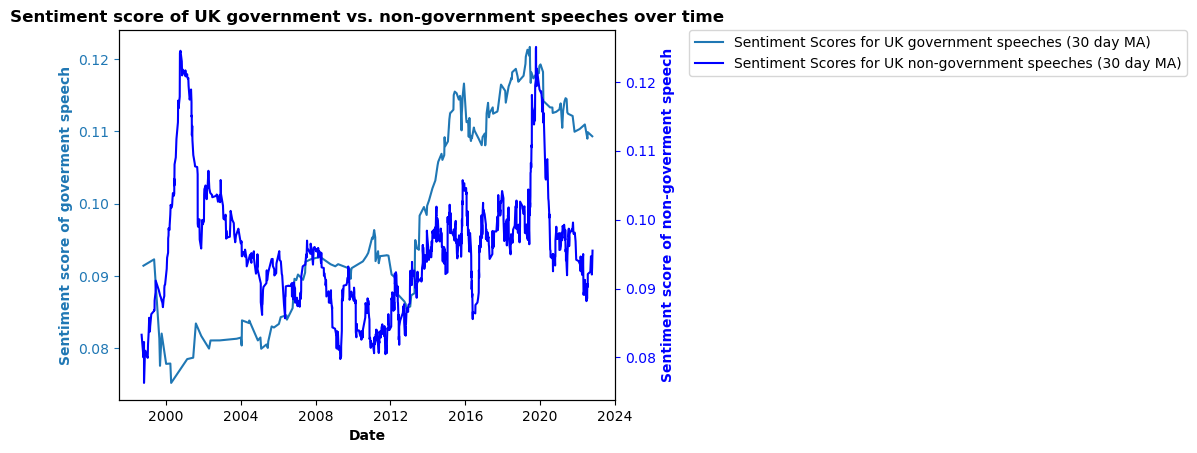

In [689]:
# Create a figure and axis for the first plot.
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis.
line1 = sns.lineplot(x='date', y='monthly_avg_text_polarity', data=uk_speeches_is_gov,\
                     label='Sentiment Scores for UK government speeches (30 day MA)', ax=ax1)

# Create a secondary y-axis.
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis and store the line.
line2, = ax2.plot(uk_speeches_not_gov['date'], uk_speeches_not_gov['monthly_avg_text_polarity'],\
                  color='blue', label='Sentiment Scores for UK non-government speeches (30 day MA)')

# Set labels for the axes with bold font and match colors.
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Sentiment score of goverment speech',\
               color=line1.get_lines()[0].get_color(), fontweight='bold')  # Match color to line1.
ax2.set_ylabel('Sentiment score of non-goverment speech', color=line2.get_color(), fontweight='bold')  # Match color to line2.

# Set tick colors to match trend colors.
ax1.tick_params(axis='y', colors=line1.get_lines()[0].get_color())
ax2.tick_params(axis='y', colors=line2.get_color())

# Get legend handles and labels for both axes.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the legend handles and labels.
handles = handles1 + handles2
labels = labels1 + labels2

# Set the line colors in the legend.
handles[0].set_color(line1.get_lines()[0].get_color())
handles[-1].set_color(line2.get_color())

# Display the combined legend outside the plot on the right-hand side.
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), borderaxespad=0)

# Add a title to the plot.
plt.title('Sentiment score of UK government vs. non-government speeches over time', fontweight='bold')

# Show the plot.
plt.show()

With further time, the sentiment of different countries would be compared/plotted against each other to determine if there's a trend between UK speech sentiment and speech sentiment in other countries. I would also investigate whether speech sentiment in other countries had an impact on UK key economic indicators.